In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
# from datetime import date, timedelta
import isoweek

%matplotlib inline

In [266]:
# !pip install isoweek

In [369]:
train = pd.read_csv('train.csv')
ss = pd.read_csv('Sample_sub.csv')

In [370]:
train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [371]:
train.describe()

,CCL_cm,CCW_cm,Weight_Kg
count,18038.000000,18035.000000,12653.000000
mean,43.090390,40.253904,9.850731
std,11.004251,9.933058,9.737378
min,2.000000,2.000000,0.020000
25%,36.330000,34.000000,5.000000
50%,41.300000,39.300000,7.500000
75%,47.000000,44.100000,10.800000
max,122.750000,106.000000,140.000000


In [372]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  18062 non-null  object 
 10  Tag_2                  18062 non-null  object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

In [373]:
train.isna().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                        0
Tag_2                        0
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       41
Status                    3633
ReleaseSite                 75
Date_TimeRelease          6108
dtype: int64

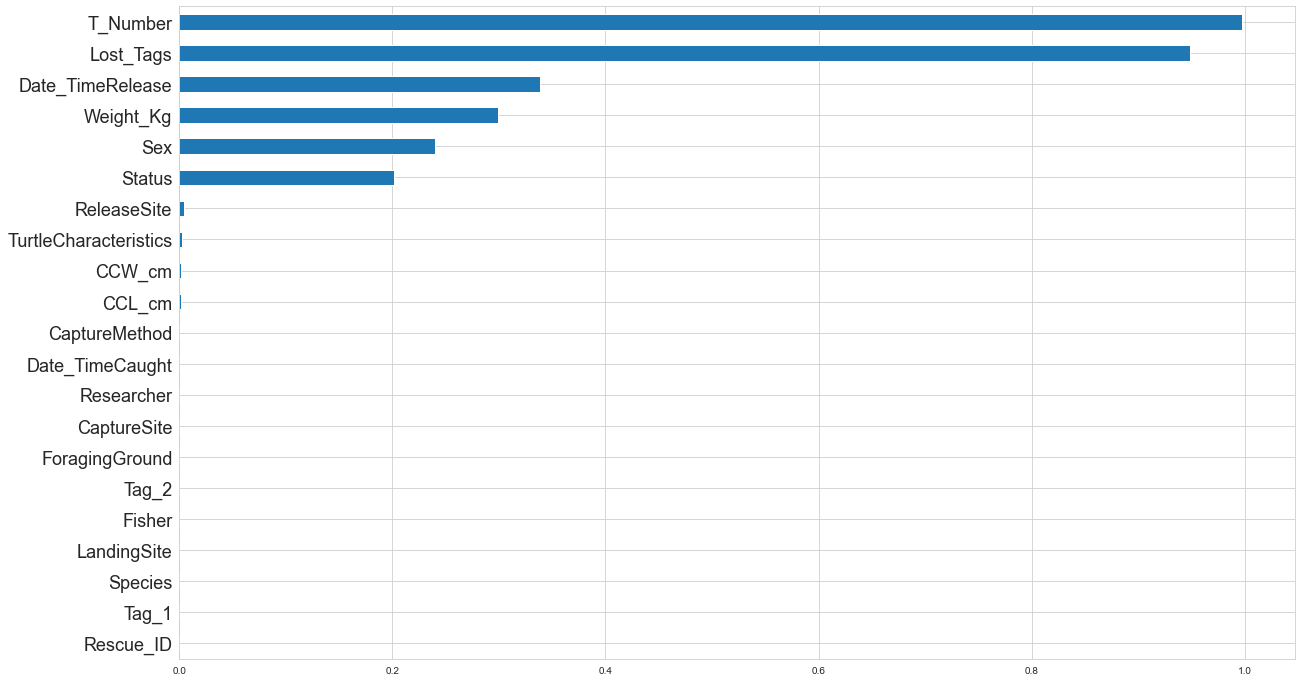

In [374]:
# showing the percentage of missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=[20,12])
(train.isna().sum()/len(train)).sort_values(ascending=True).plot(kind='barh', ax=ax)
plt.yticks(fontsize=18)
plt.show()

In [375]:
drop_cols = ['T_Number', 'Lost_Tags', 'Date_TimeRelease', 'Weight_Kg', 'Sex', 'Status', 'ReleaseSite', 'TurtleCharacteristics', 'CCW_cm', 'CCL_cm']

train.drop(drop_cols, axis=1, inplace=True)

In [376]:
ss.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [377]:
train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None


In [378]:
train.isna().sum()

Rescue_ID          0
Date_TimeCaught    0
Researcher         0
CaptureSite        0
ForagingGround     0
CaptureMethod      0
Fisher             0
LandingSite        0
Species            0
Tag_1              0
Tag_2              0
dtype: int64

In [379]:
train['Date_TimeCaught'] = pd.to_datetime(train['Date_TimeCaught'])

In [380]:
train['Year_Caught'] = train['Date_TimeCaught'].dt.year
train['Month_Caught'] = train['Date_TimeCaught'].dt.month
train['Week_Caught'] = train['Date_TimeCaught'].dt.weekofyear

C:\Users\USER\AppData\Local\Temp/ipykernel_10364/2166490134.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week_Caught'] = train['Date_TimeCaught'].dt.weekofyear


In [381]:
ss.tail()

,ID,Capture_Number
1271,CaptureSite_9_201940,0
1272,CaptureSite_9_201941,7
1273,CaptureSite_9_201942,7
1274,CaptureSite_9_201943,3
1275,CaptureSite_9_201944,5


In [382]:
# ss[ss['ID']=='CaptureSite_0_201945']

In [383]:
for col in train.columns:
    print(f"{col} number of unique types => {train[col].nunique()}")

Rescue_ID number of unique types => 18062
Date_TimeCaught number of unique types => 5237
Researcher number of unique types => 35
CaptureSite number of unique types => 29
ForagingGround number of unique types => 3
CaptureMethod number of unique types => 15
Fisher number of unique types => 2085
LandingSite number of unique types => 5
Species number of unique types => 8
Tag_1 number of unique types => 8236
Tag_2 number of unique types => 247
Year_Caught number of unique types => 21
Month_Caught number of unique types => 12
Week_Caught number of unique types => 53


In [384]:
train.shape

(18062, 14)

In [385]:
# info needed
# capture site
# year
# week number

In [386]:
train['CaptureSite'].value_counts()

CaptureSite_25    2574
CaptureSite_9     2169
CaptureSite_15    1986
CaptureSite_23    1906
CaptureSite_16     957
CaptureSite_13     821
CaptureSite_1      793
CaptureSite_21     714
CaptureSite_27     686
CaptureSite_5      646
CaptureSite_12     573
CaptureSite_10     464
CaptureSite_19     415
CaptureSite_7      369
CaptureSite_22     364
CaptureSite_4      338
CaptureSite_24     337
CaptureSite_11     312
CaptureSite_2      301
CaptureSite_17     251
CaptureSite_14     211
CaptureSite_28     148
CaptureSite_6      148
CaptureSite_20     143
CaptureSite_3      121
CaptureSite_8      114
CaptureSite_0       95
CaptureSite_26      77
CaptureSite_18      29
Name: CaptureSite, dtype: int64

In [387]:
train['Year_Caught'].value_counts()

2012    1650
2014    1627
2015    1590
2018    1561
2017    1554
2011    1399
2016    1396
2013    1331
2010    1134
2008     856
2009     819
2007     617
2003     544
2004     456
2005     445
2006     404
2002     291
2001     270
2000      62
1999      40
1998      16
Name: Year_Caught, dtype: int64

In [388]:
train['Week_Caught'].value_counts()

48    554
50    534
49    530
46    490
44    472
47    465
51    461
45    456
41    428
43    425
42    416
40    388
37    358
39    358
7     357
2     352
9     352
1     351
5     348
52    346
38    329
35    327
14    319
3     317
36    316
11    313
30    313
13    313
8     311
17    310
26    309
10    308
34    306
4     306
24    306
25    300
16    300
23    299
12    298
33    295
15    294
6     293
19    293
32    289
27    289
28    285
29    285
31    279
18    274
22    272
21    269
20    241
53     63
Name: Week_Caught, dtype: int64

In [389]:
train_ = train[['CaptureSite', 'Year_Caught', 'Week_Caught']]

In [390]:
train_.head()

,CaptureSite,Year_Caught,Week_Caught
0,CaptureSite_0,2000,51
1,CaptureSite_0,2001,43
2,CaptureSite_0,2001,44
3,CaptureSite_0,2002,11
4,CaptureSite_0,2002,32


In [391]:
train_ = train_.sort_values(['CaptureSite', 'Year_Caught', 'Week_Caught'])

In [392]:
# CaptureSite_9_201940

In [393]:
train_['ID'] = train_['CaptureSite'] + '_' + train_['Year_Caught'].astype(str) + train_['Week_Caught'].astype(str)

In [394]:
train_.groupby('ID')['ID'].count()

ID
CaptureSite_0_200051    1
CaptureSite_0_200143    1
CaptureSite_0_200144    1
CaptureSite_0_200211    1
CaptureSite_0_200232    2
                       ..
CaptureSite_9_201852    3
CaptureSite_9_20186     5
CaptureSite_9_20187     9
CaptureSite_9_20188     9
CaptureSite_9_20189     6
Name: ID, Length: 7957, dtype: int64

In [395]:
tr_ = train_.groupby(['CaptureSite', 'Year_Caught', 'Week_Caught']).count().reset_index()

In [396]:
tr_[(tr_['CaptureSite']=='CaptureSite_0') & (tr_['Year_Caught']==2000)]['ID']

0    1
Name: ID, dtype: int64

<AxesSubplot:>

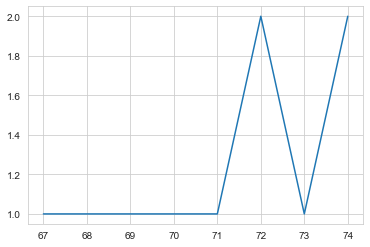

In [397]:
tr_[(tr_['CaptureSite']=='CaptureSite_0') & (tr_['Year_Caught']==2018)]['ID'].plot()

<AxesSubplot:>

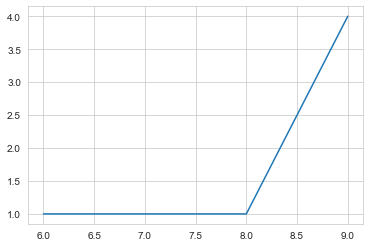

In [398]:
tr_[(tr_['CaptureSite']=='CaptureSite_0') & (tr_['Year_Caught']==2003)]['ID'].plot()

<AxesSubplot:>

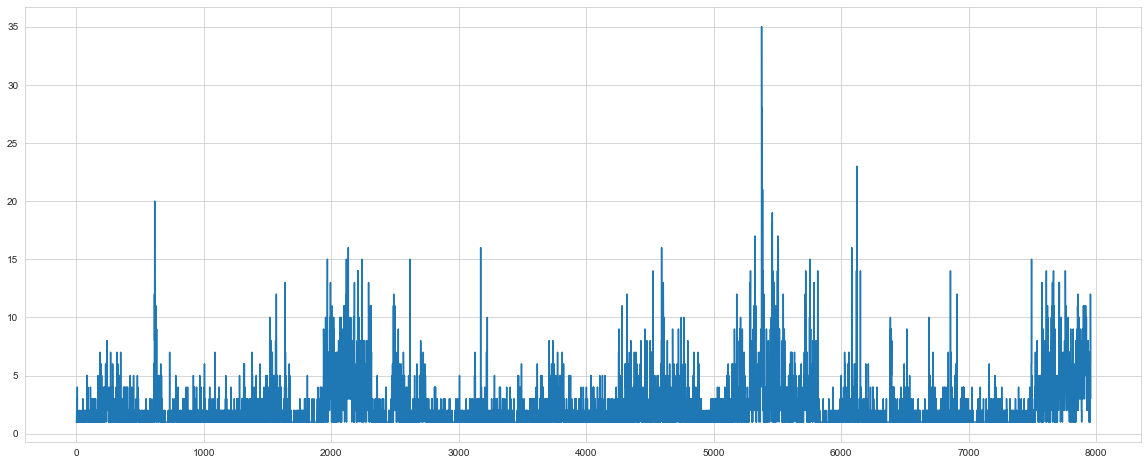

In [399]:
tr_['ID'].plot(figsize=(20,8))

In [400]:
tr_.head()

,CaptureSite,Year_Caught,Week_Caught,ID
0,CaptureSite_0,2000,51,1
1,CaptureSite_0,2001,43,1
2,CaptureSite_0,2001,44,1
3,CaptureSite_0,2002,11,1
4,CaptureSite_0,2002,32,2


In [401]:
tr_['capsite_year'] = tr_['CaptureSite'] + '_' + tr_['Year_Caught'].astype(str)

In [402]:
tr_pv = pd.pivot_table(data=tr_, index='capsite_year', columns='Week_Caught', values='ID', fill_value=0)

In [403]:
tr_pv.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53],
           dtype='int64', name='Week_Caught')

In [404]:
tr_pv

Week_Caught,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
capsite_year,,,,,,,,,,,,,,,,,,,,,
CaptureSite_0_2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CaptureSite_0_2001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CaptureSite_0_2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CaptureSite_0_2003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CaptureSite_0_2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CaptureSite_9_2014,4,10,5,7,6,6,1,5,7,5,...,5,11,14,12,9,7,11,10,6,0
CaptureSite_9_2015,6,2,7,0,5,2,6,5,6,6,...,4,4,2,1,6,6,4,0,6,3
CaptureSite_9_2016,4,5,1,4,9,0,3,2,1,2,...,3,10,11,9,6,12,5,0,0,2


In [405]:
ser_dt = pd.melt(tr_pv,ignore_index=False).reset_index() # converting data pivot from wide to long format

In [406]:
ser_dt.head()

,capsite_year,Week_Caught,value
0,CaptureSite_0_2000,1,0
1,CaptureSite_0_2001,1,0
2,CaptureSite_0_2002,1,0
3,CaptureSite_0_2003,1,0
4,CaptureSite_0_2004,1,0


In [407]:
ser_dt[ser_dt['capsite_year']=='CaptureSite_0_2000']

,capsite_year,Week_Caught,value
0,CaptureSite_0_2000,1,0
477,CaptureSite_0_2000,2,0
954,CaptureSite_0_2000,3,0
1431,CaptureSite_0_2000,4,0
1908,CaptureSite_0_2000,5,0
2385,CaptureSite_0_2000,6,0
2862,CaptureSite_0_2000,7,0
3339,CaptureSite_0_2000,8,0
3816,CaptureSite_0_2000,9,0
4293,CaptureSite_0_2000,10,0


<AxesSubplot:>

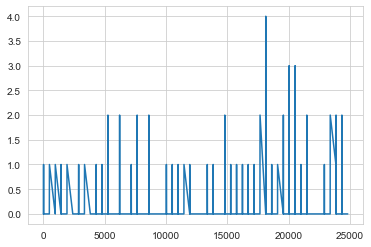

In [408]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_0_')]['value'].plot()

<AxesSubplot:>

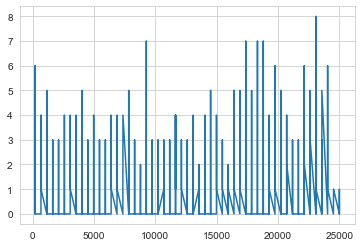

In [409]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_1_')]['value'].plot()

<AxesSubplot:>

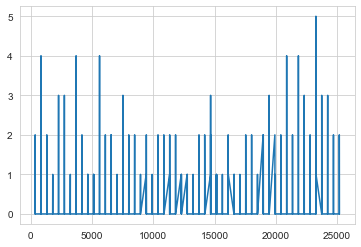

In [410]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_2_')]['value'].plot()

<AxesSubplot:>

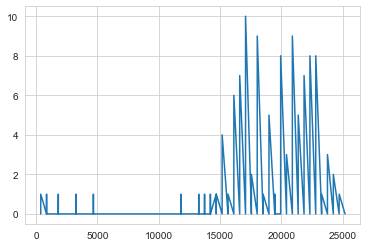

In [411]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'].plot()

<AxesSubplot:>

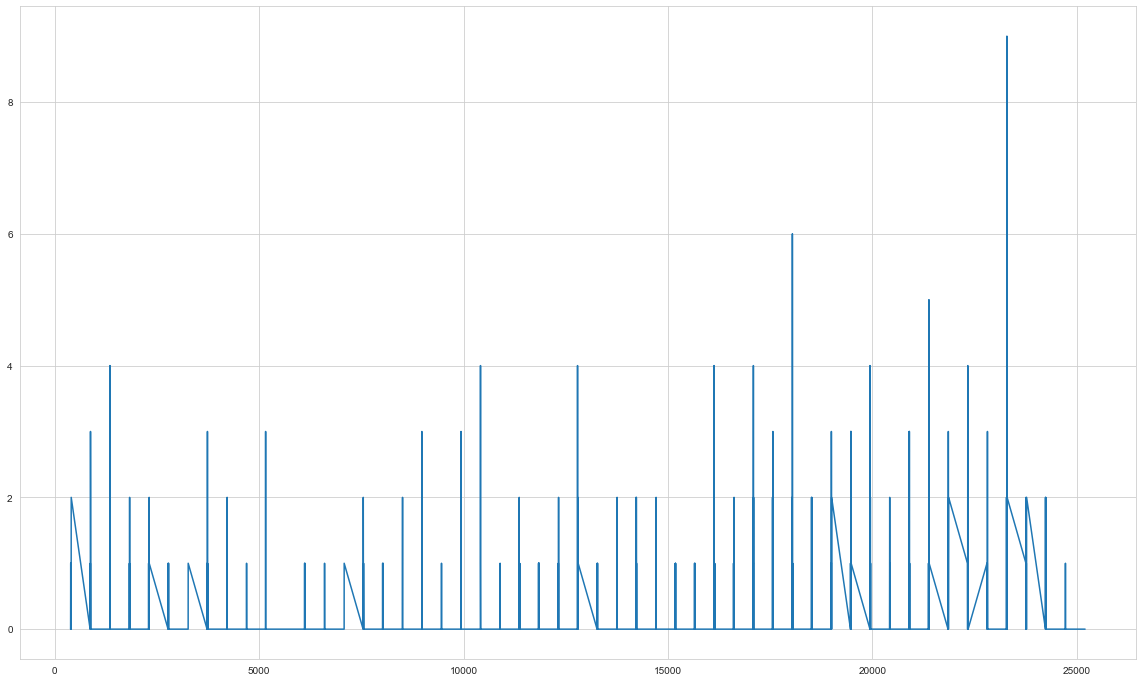

In [412]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_4_')]['value'].plot(kind='line', figsize=(20,12))

<AxesSubplot:>

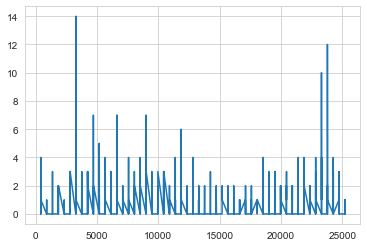

In [413]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_5_')]['value'].plot()

<AxesSubplot:>

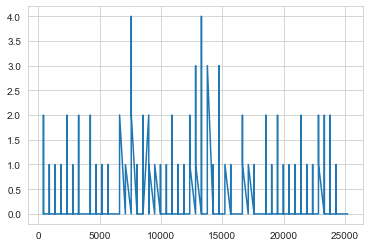

In [414]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_6_')]['value'].plot()

<AxesSubplot:>

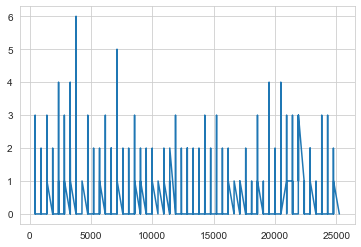

In [415]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_7_')]['value'].plot()

<AxesSubplot:>

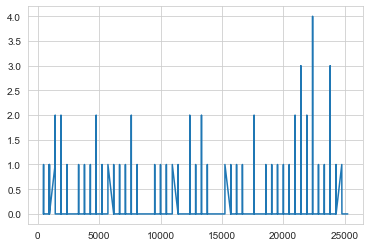

In [416]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_8_')]['value'].plot()

<AxesSubplot:>

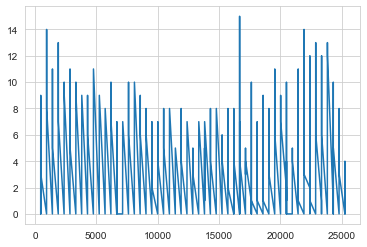

In [417]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_9_')]['value'].plot()

<AxesSubplot:>

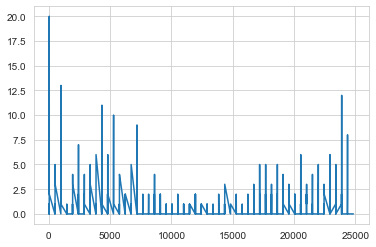

In [418]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_10_')]['value'].plot()

<AxesSubplot:>

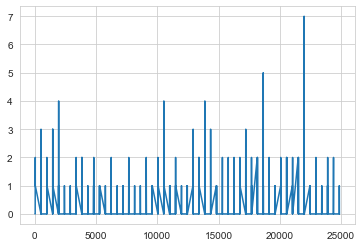

In [419]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_11_')]['value'].plot()

<AxesSubplot:>

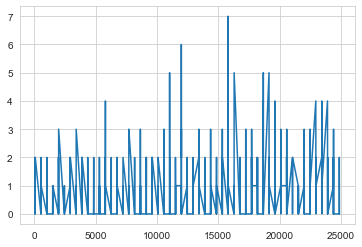

In [420]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_12_')]['value'].plot()

In [421]:
tr_['CaptureSite'].unique()

array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [422]:
adfuller(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_12_')]['value'])

(-5.171472939856501,
 1.0050965598050994e-05,
 18,
 935,
 {'1%': -3.437363201927513,
  '5%': -2.864636122077874,
  '10%': -2.5684185607252137},
 2506.0849588919573)

In [423]:
t_list = [
    'CaptureSite_0_',
    'CaptureSite_1_',
    'CaptureSite_10_',
    'CaptureSite_11_',
    'CaptureSite_12_',
    'CaptureSite_13_',
    'CaptureSite_14_',
    'CaptureSite_15_',
    'CaptureSite_16_',
    'CaptureSite_17_',
    'CaptureSite_18_',
    'CaptureSite_19_',
    'CaptureSite_2_',
    'CaptureSite_20_',
    'CaptureSite_21_',
    'CaptureSite_22_',
    'CaptureSite_23_',
    'CaptureSite_24_',
    'CaptureSite_25_',
    'CaptureSite_26_',
    'CaptureSite_27_',
    'CaptureSite_28_',
    'CaptureSite_3_',
    'CaptureSite_4_',
    'CaptureSite_5_',
    'CaptureSite_6_',
    'CaptureSite_7_',
    'CaptureSite_8_',
    'CaptureSite_9_'
]

for value in t_list:  
    ad_f = adfuller(ser_dt[ser_dt['capsite_year'].str.contains(value)]['value'])           
    if ad_f[1] >= 0.05:
        print(f"{value.strip('_')} site data is non-stationary")       

CaptureSite_3 site data is non-stationary


In [424]:
adfuller(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'])

(-1.618406963519956,
 0.4735645642751471,
 15,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 943.6518467494951)

<AxesSubplot:>

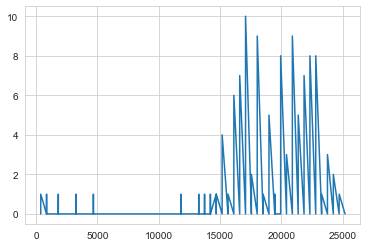

In [425]:
ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'].plot()

In [426]:
# checking the number of weeks in the capture years

train_['Year_Caught'].unique()

array([2000, 2001, 2002, 2003, 2004, 2008, 2009, 2010, 2011, 2012, 2014,
       2015, 2016, 2017, 2018, 2006, 2013, 2005, 2007, 1998, 1999],
      dtype=int64)

In [427]:
isoweek.Week.last_week_of_year(2000).week

52

In [428]:
for year in train_['Year_Caught'].unique():
    print(f"{year} => {isoweek.Week.last_week_of_year(year).week}")

2000 => 52
2001 => 52
2002 => 52
2003 => 52
2004 => 53
2008 => 52
2009 => 53
2010 => 52
2011 => 52
2012 => 52
2014 => 52
2015 => 53
2016 => 52
2017 => 52
2018 => 52
2006 => 52
2013 => 52
2005 => 52
2007 => 52
1998 => 53
1999 => 52


In [429]:
ser_dt.head()

,capsite_year,Week_Caught,value
0,CaptureSite_0_2000,1,0
1,CaptureSite_0_2001,1,0
2,CaptureSite_0_2002,1,0
3,CaptureSite_0_2003,1,0
4,CaptureSite_0_2004,1,0


In [430]:
ser_dt['year'] = ser_dt['capsite_year'].str.split('_').str[-1]

In [431]:
ser_dt['year'].dtype

dtype('O')

In [432]:
drop_idx = []

for year in ['2000',
'2001',
'2002',
'2003',
'2008',
'2010',
'2011',
'2012',
'2014',
'2016',
'2017',
'2018',
'2006',
'2013',
'2005',
'2007',
'1999']:
    idx = ser_dt[(ser_dt['year']==year) & (ser_dt['Week_Caught']==53)].index
    if (ser_dt.loc[idx,:]['value']!=0).sum() > 0:
        print(year)
    else:
        drop_idx.extend(list(idx))

2010
2016
2005


In [433]:
# drop_idx

In [434]:
ser_dt[(ser_dt['year']=='2010') & (ser_dt['Week_Caught']==53)]

,capsite_year,Week_Caught,value,year
24811,CaptureSite_0_2010,53,0,2010
24829,CaptureSite_10_2010,53,0,2010
24850,CaptureSite_11_2010,53,1,2010
24868,CaptureSite_12_2010,53,2,2010
24885,CaptureSite_13_2010,53,1,2010
24903,CaptureSite_14_2010,53,0,2010
24919,CaptureSite_15_2010,53,0,2010
24940,CaptureSite_16_2010,53,3,2010
24951,CaptureSite_17_2010,53,0,2010
24965,CaptureSite_18_2010,53,1,2010


In [435]:
for year in ['2010', '2016', '2005']:
#     idx = ser_dt[(ser_dt['year']=='2010') & (ser_dt['Week_Caught']==53) & (ser_dt['value']==0)].index
    idx = ser_dt[(ser_dt['year']=='2010') & (ser_dt['Week_Caught']==53)].index
    drop_idx.extend(list(idx))

In [436]:
# drop_idx

In [437]:
ser_dt.drop(drop_idx, inplace=True)

In [438]:
ser_dt.head()

,capsite_year,Week_Caught,value,year
0,CaptureSite_0_2000,1,0,2000
1,CaptureSite_0_2001,1,0,2001
2,CaptureSite_0_2002,1,0,2002
3,CaptureSite_0_2003,1,0,2003
4,CaptureSite_0_2004,1,0,2004


In [439]:
# for value in t_list:
#     fig, ax = plt.subplots()
#     ser_dt[ser_dt['capsite_year'].str.contains(value)].sort_values(by=['year', 'Week_Caught']).set_index('Week_Caught')['value'].plot(ax=ax)

In [440]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp/ipykernel_10364/3880014338.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,12])


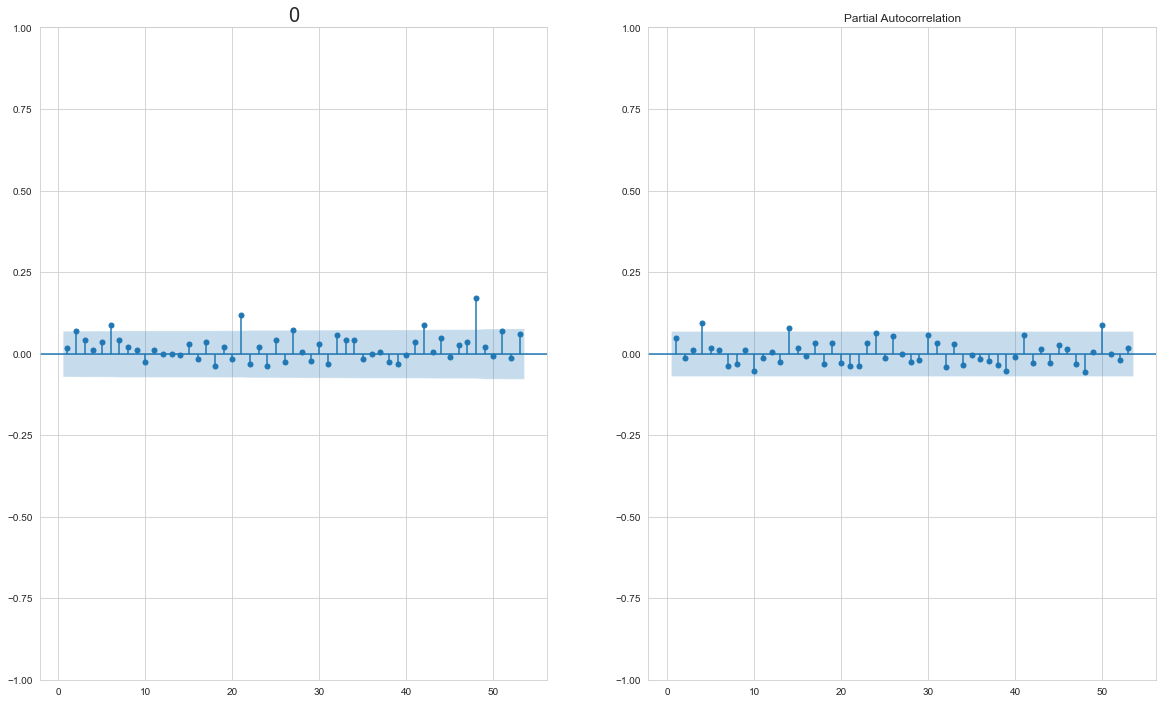

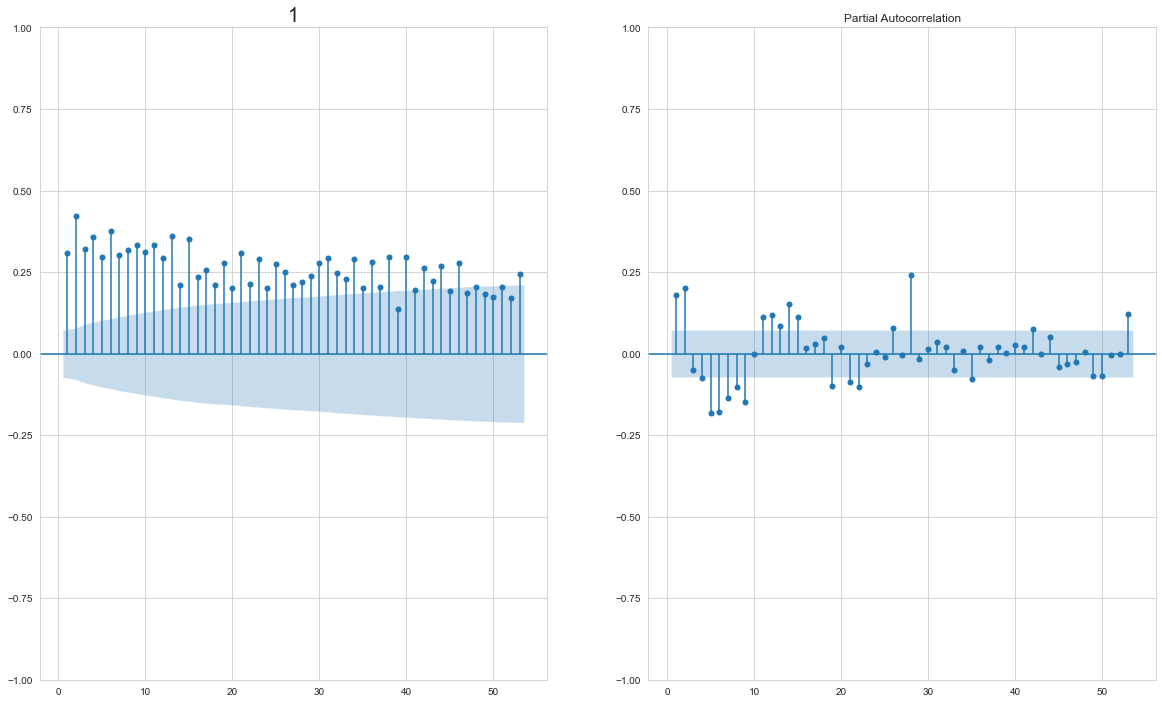

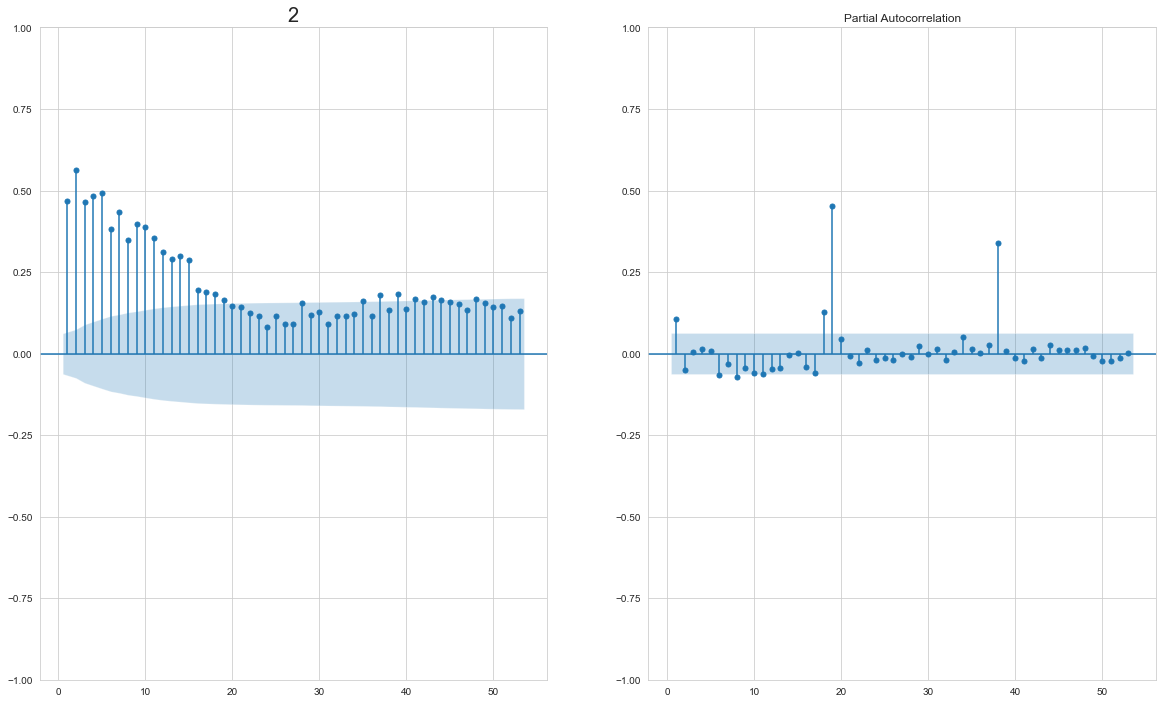

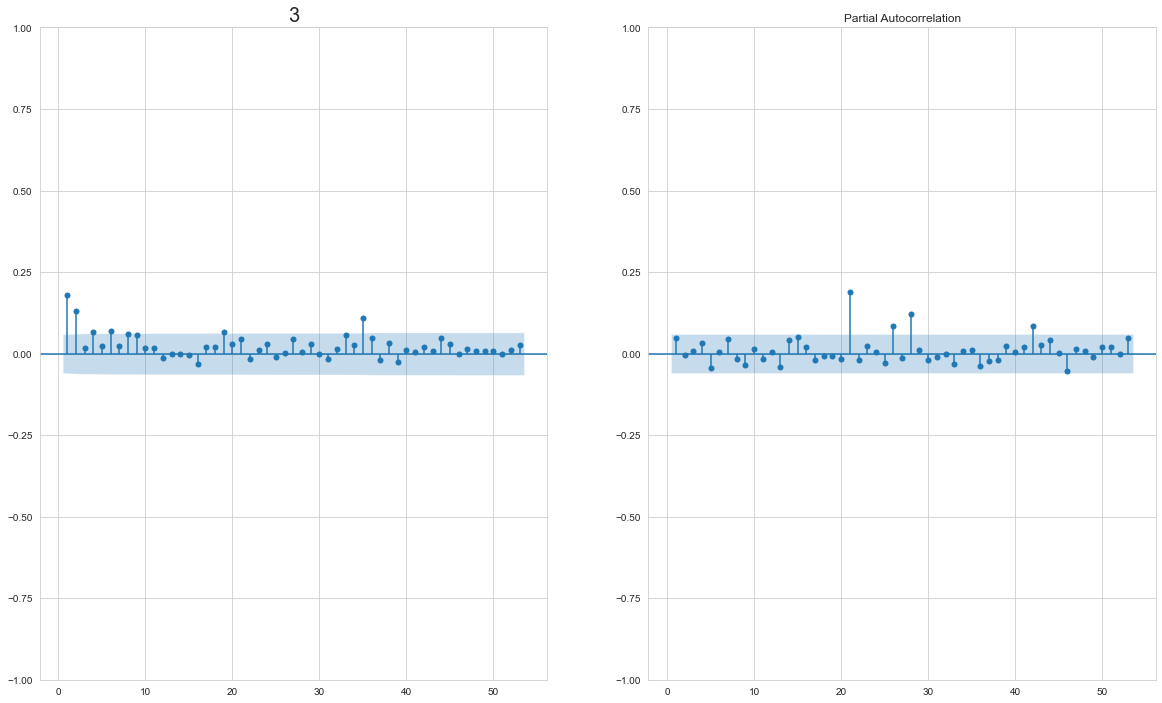

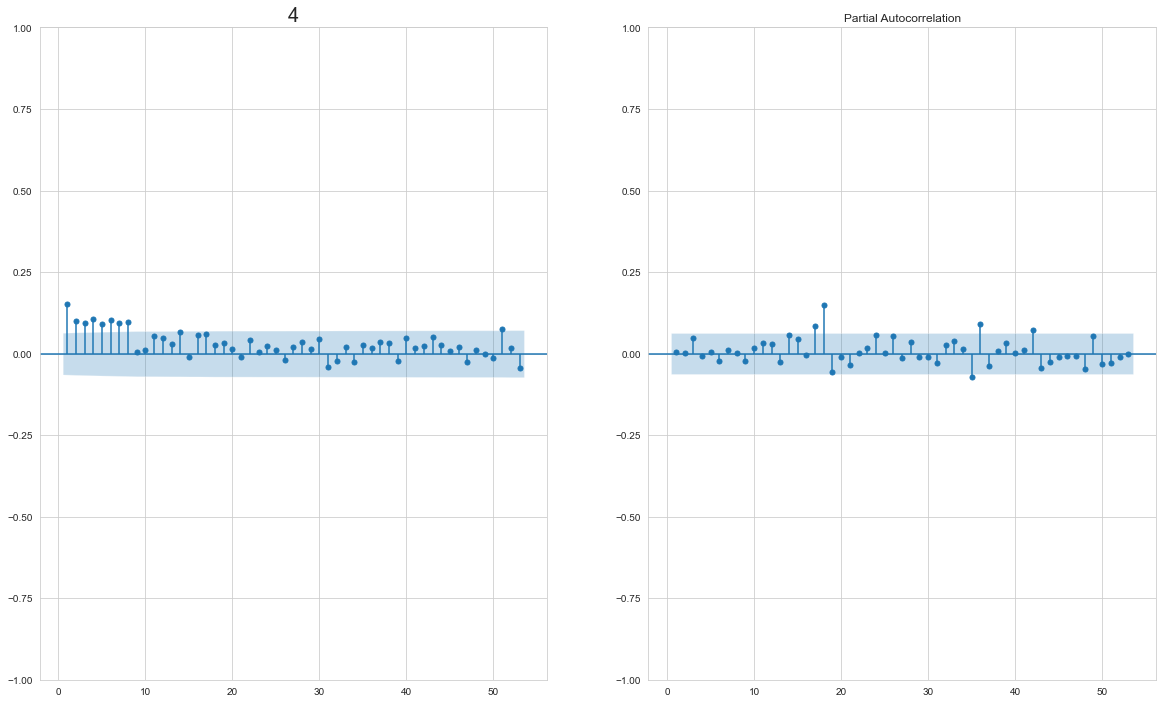

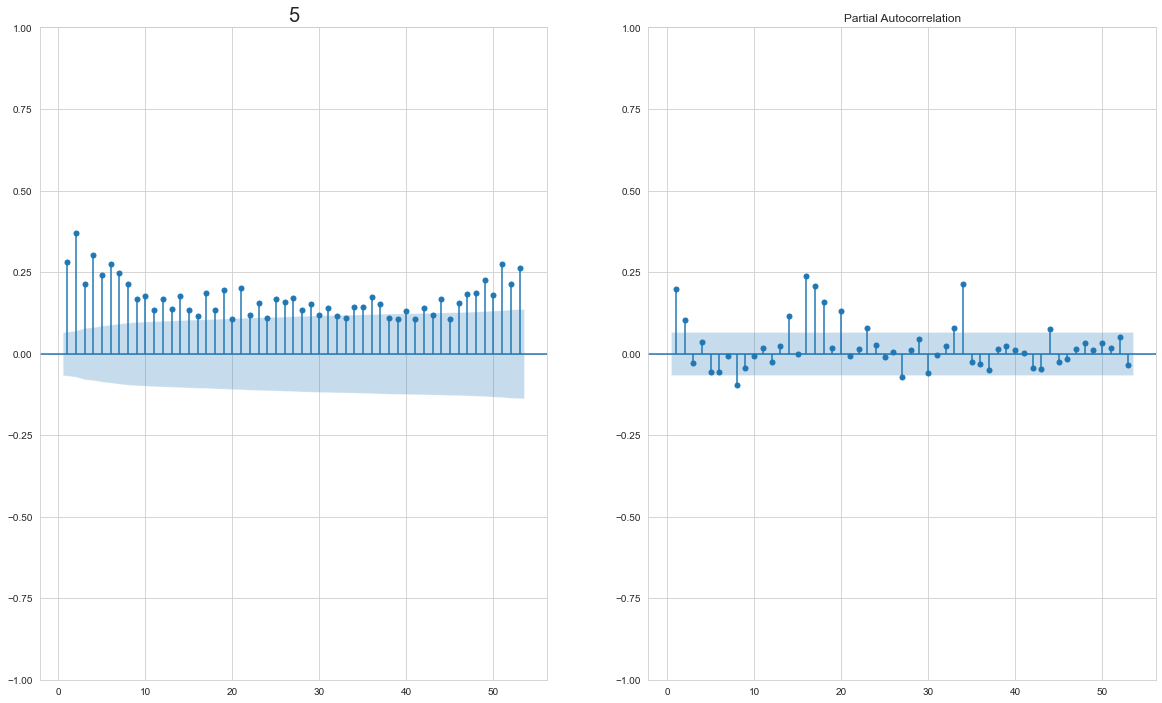

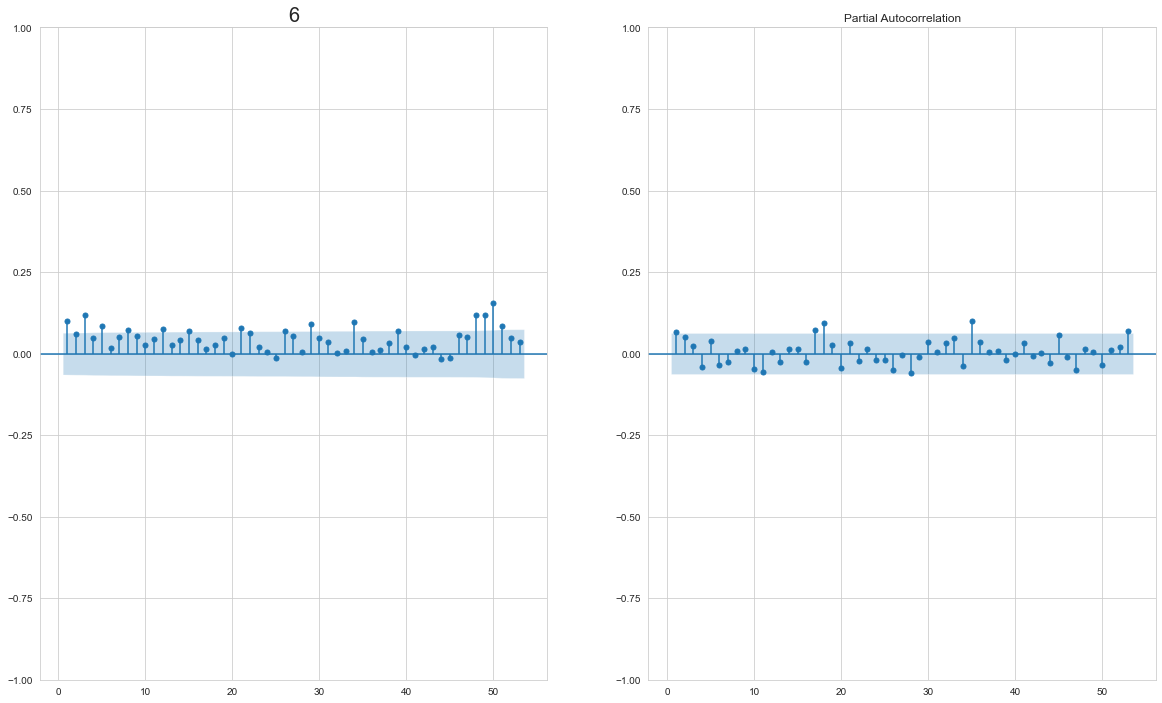

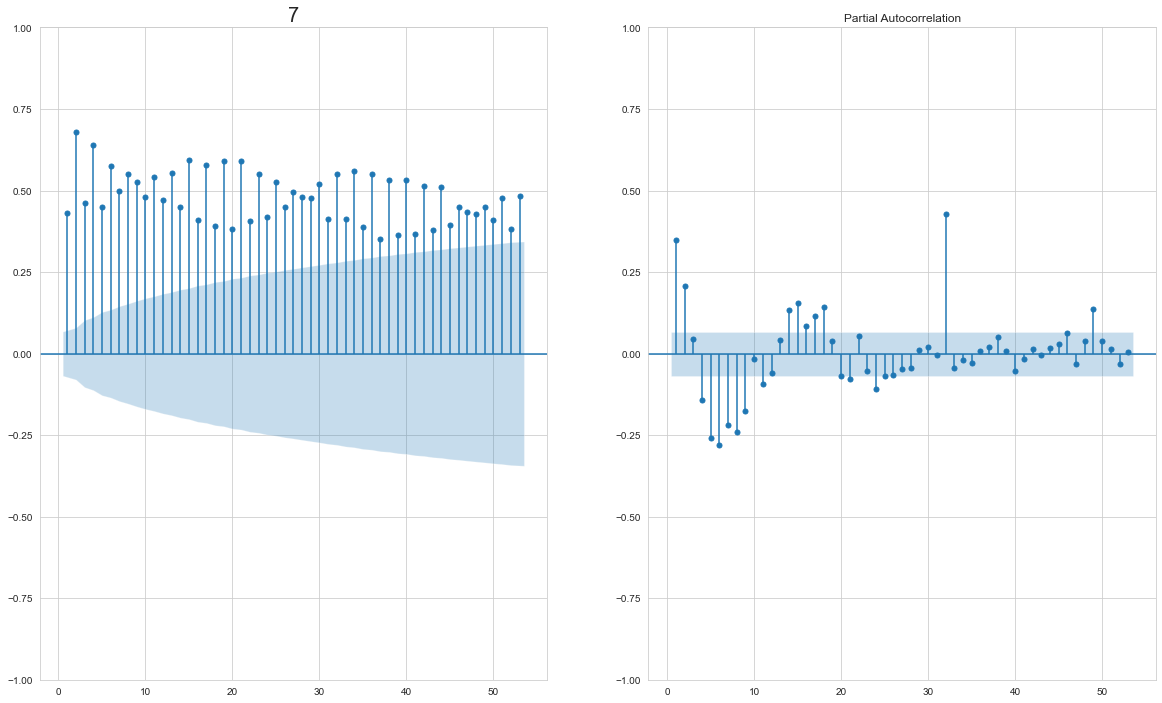

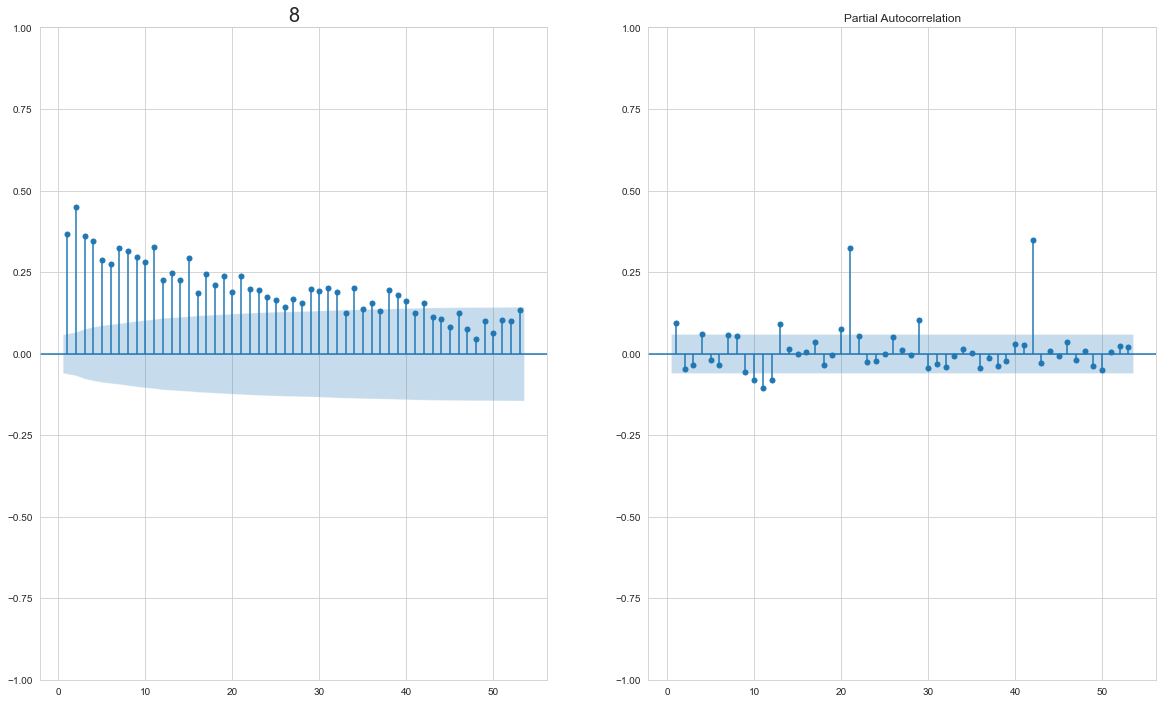

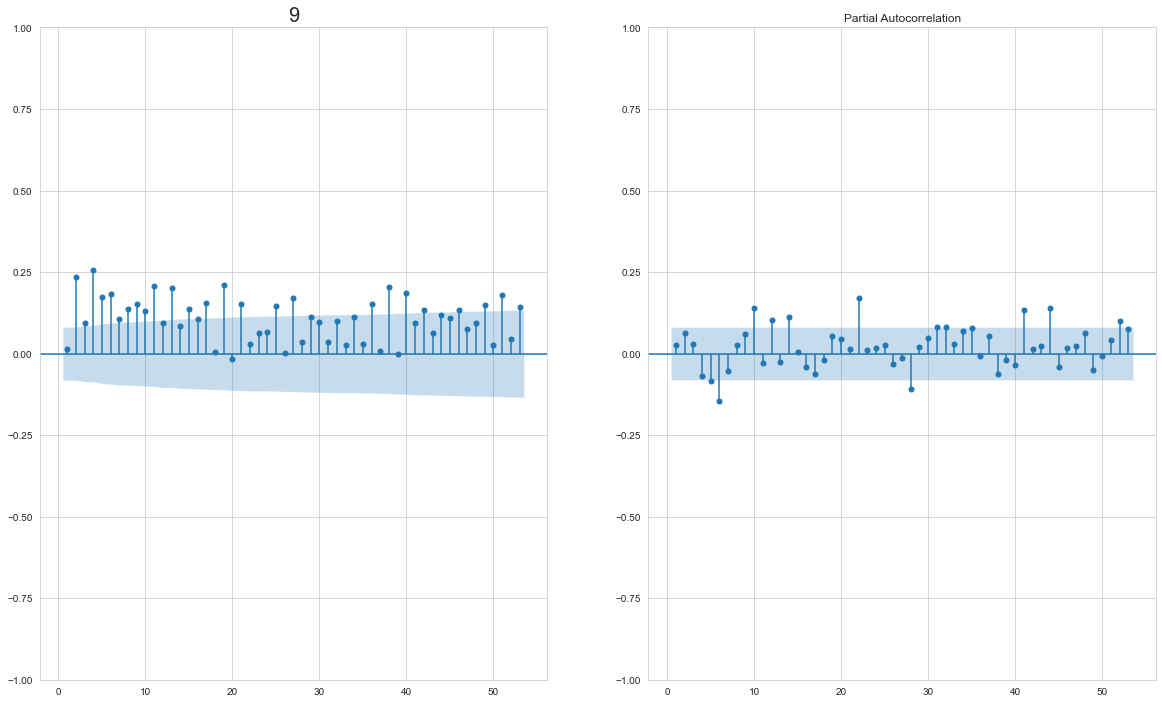

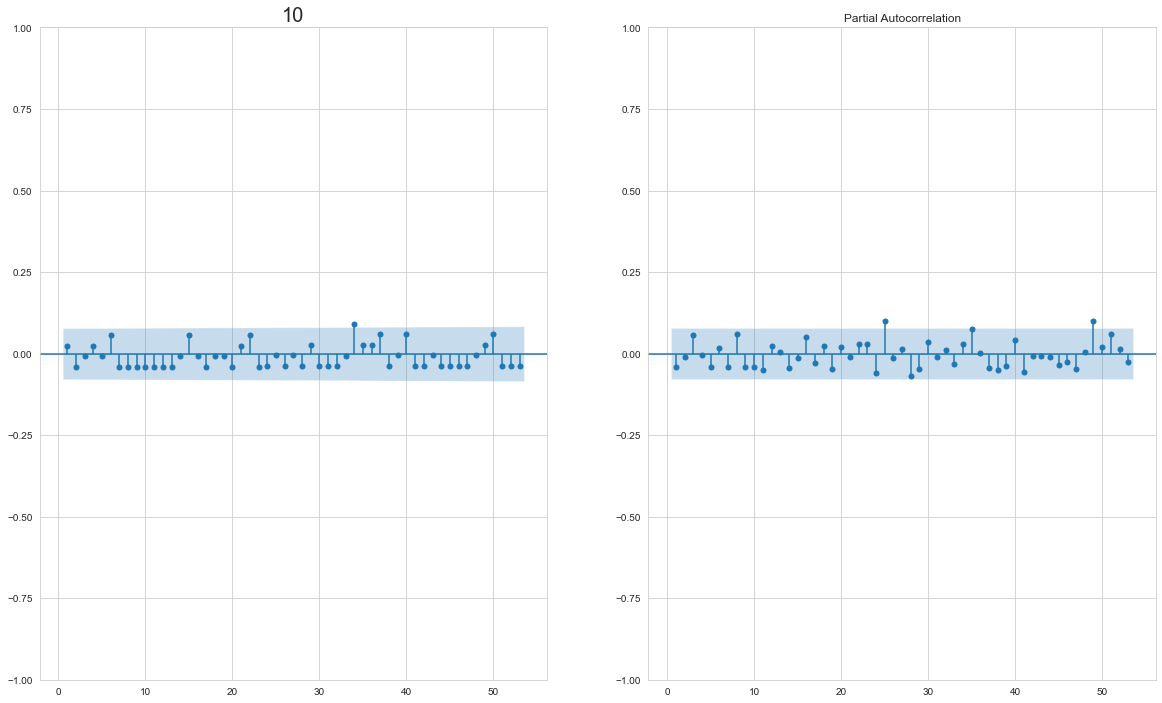

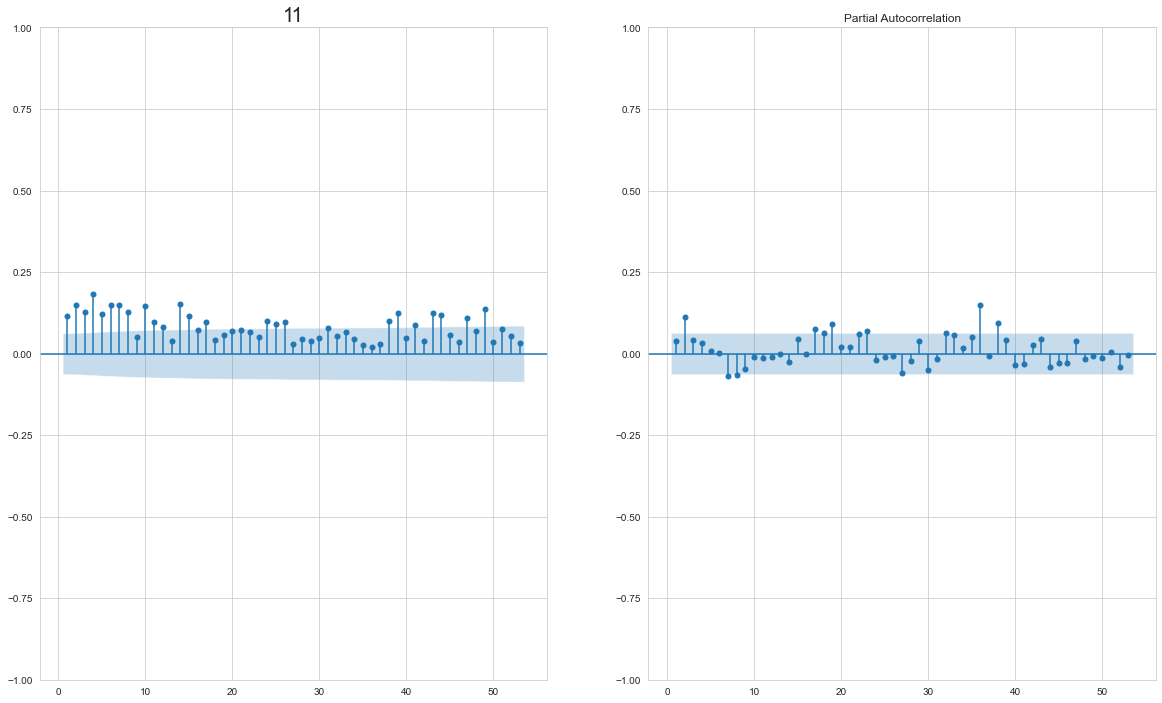

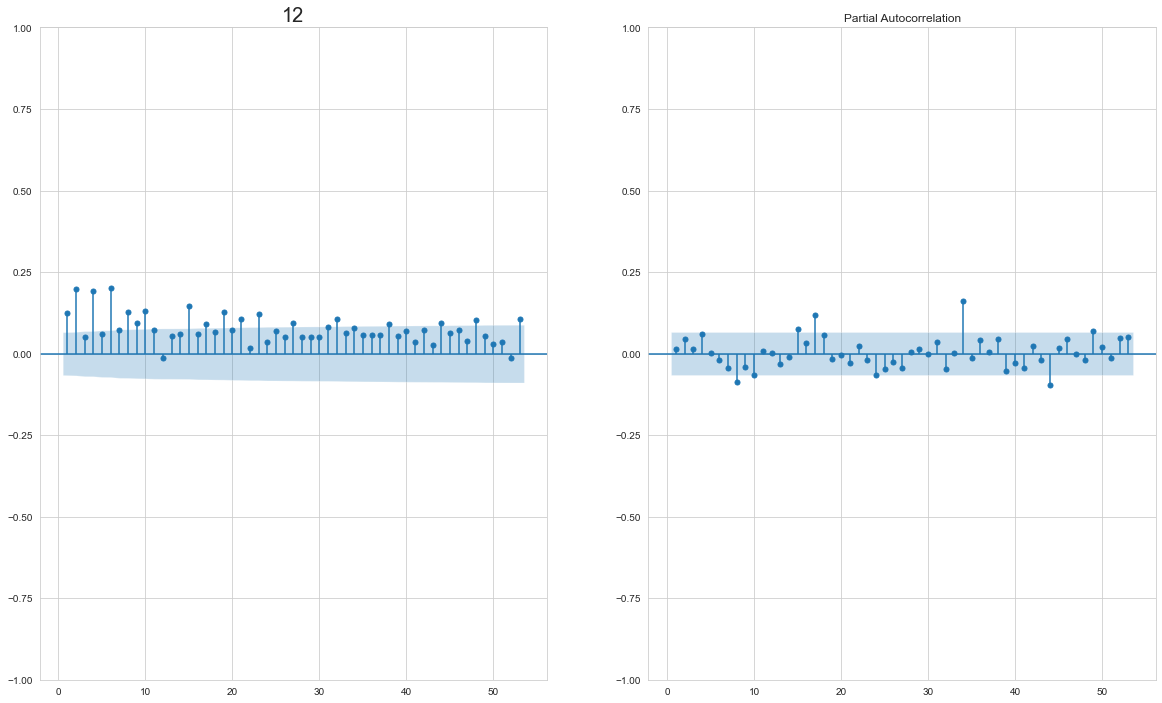

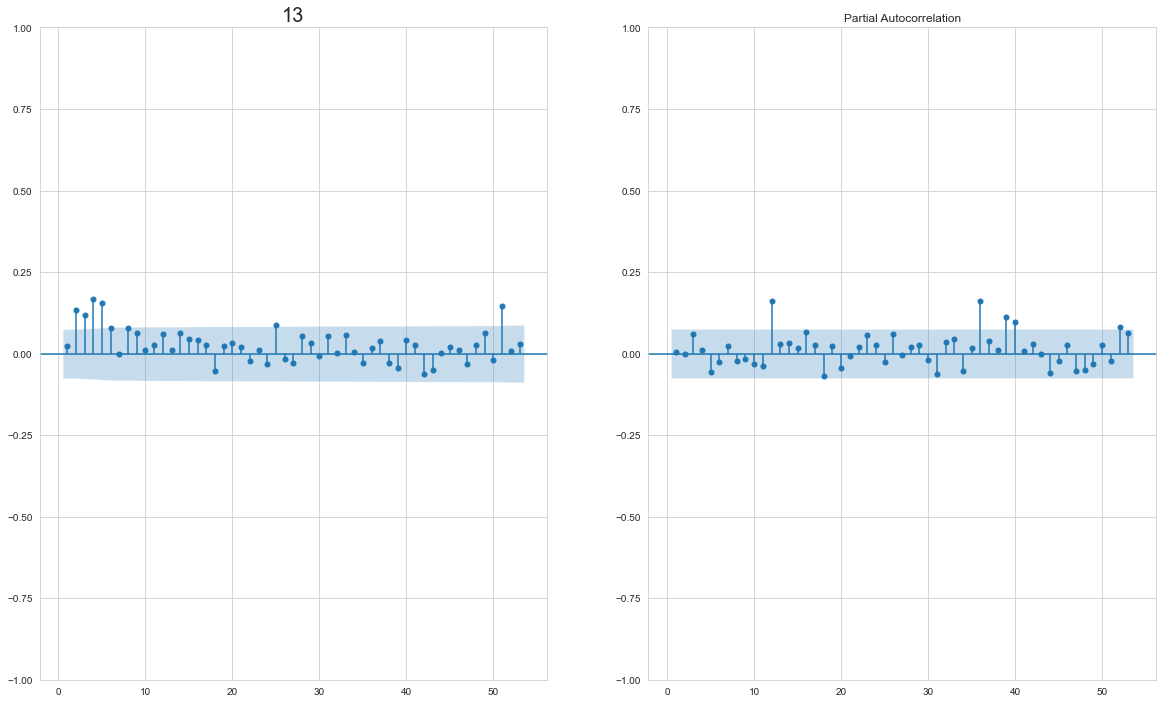

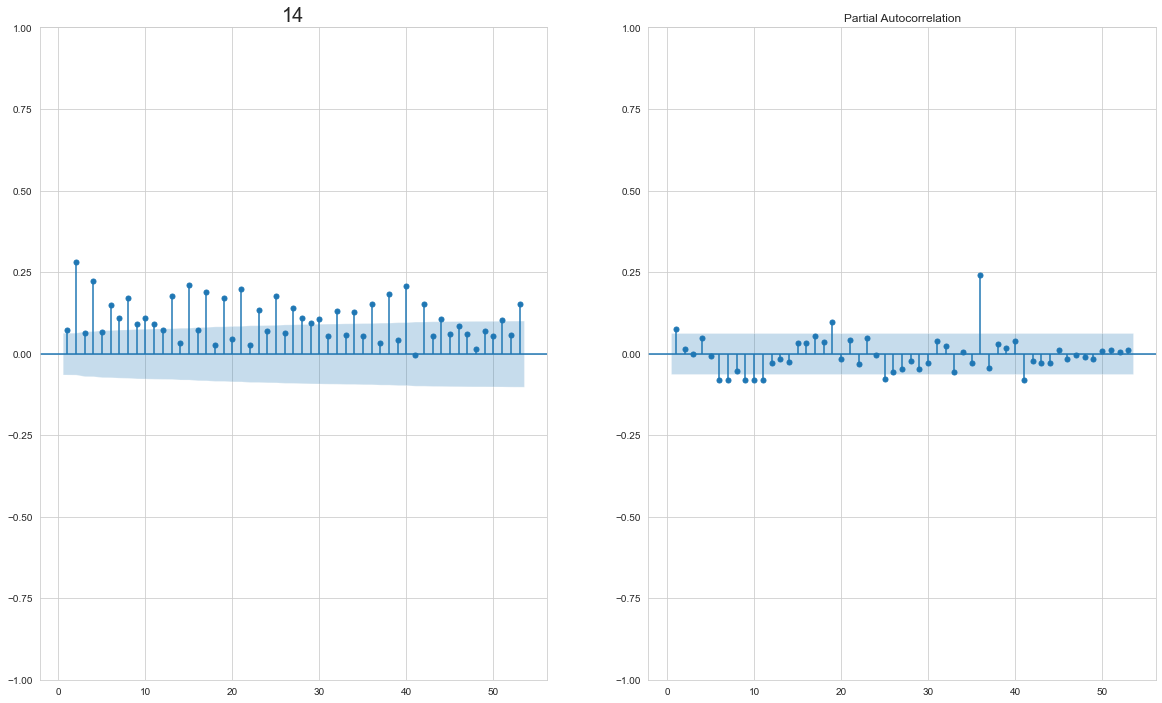

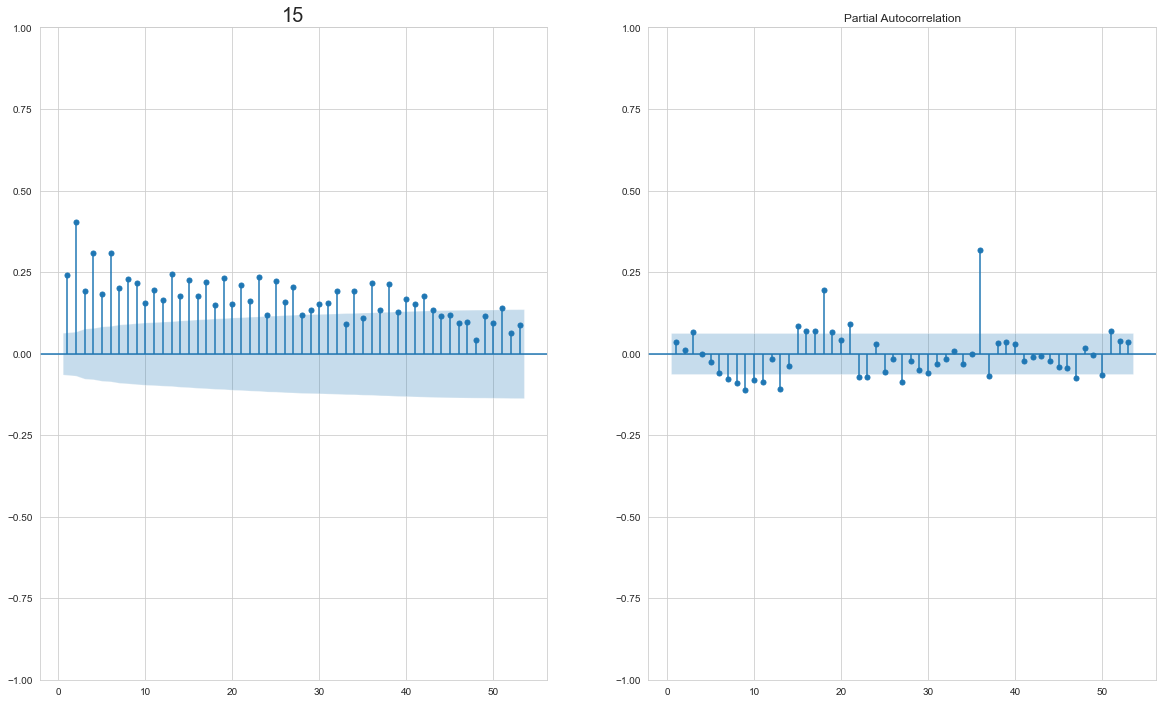

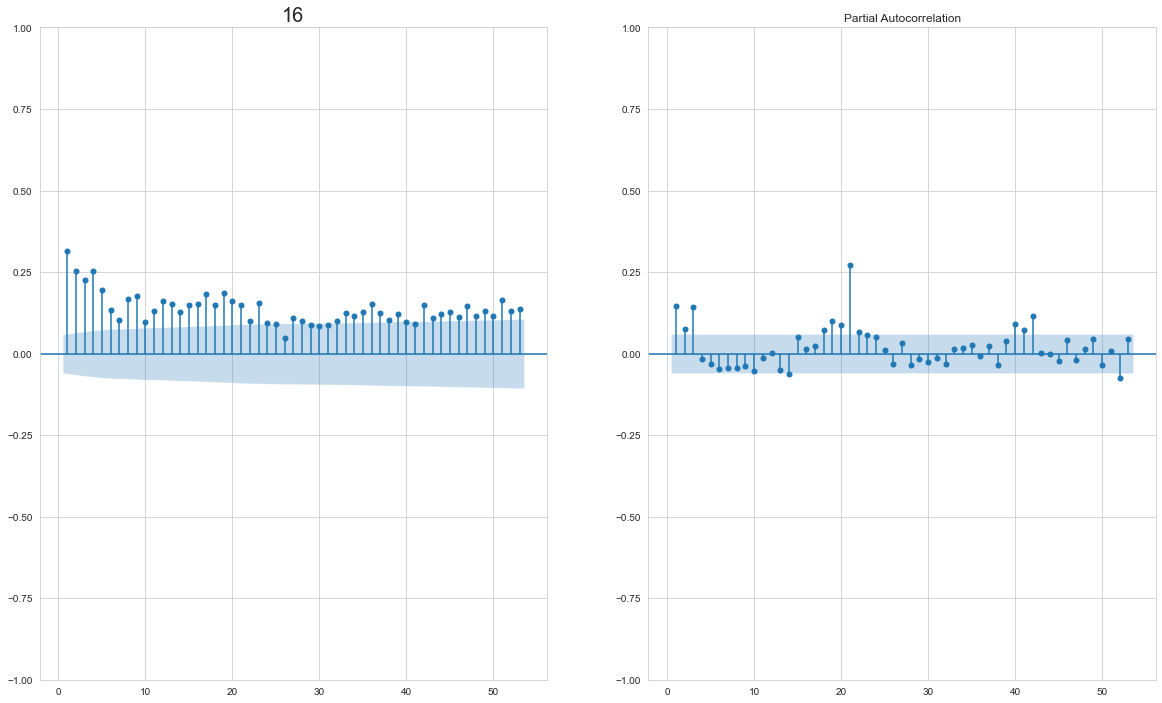

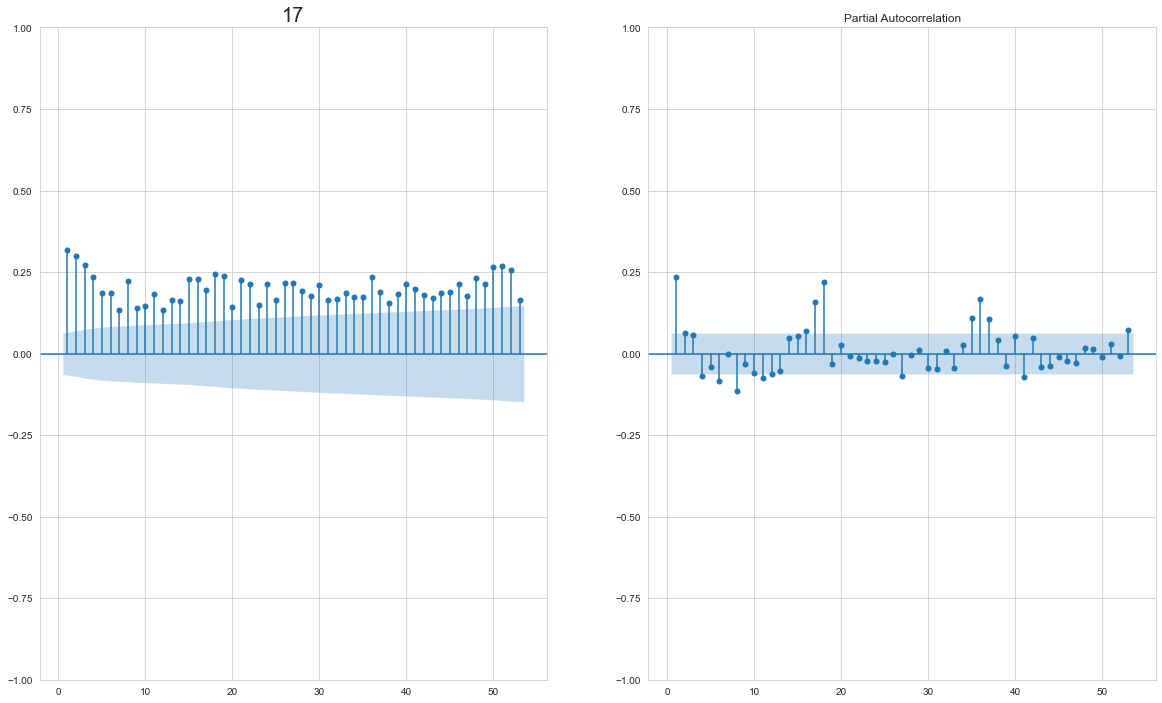

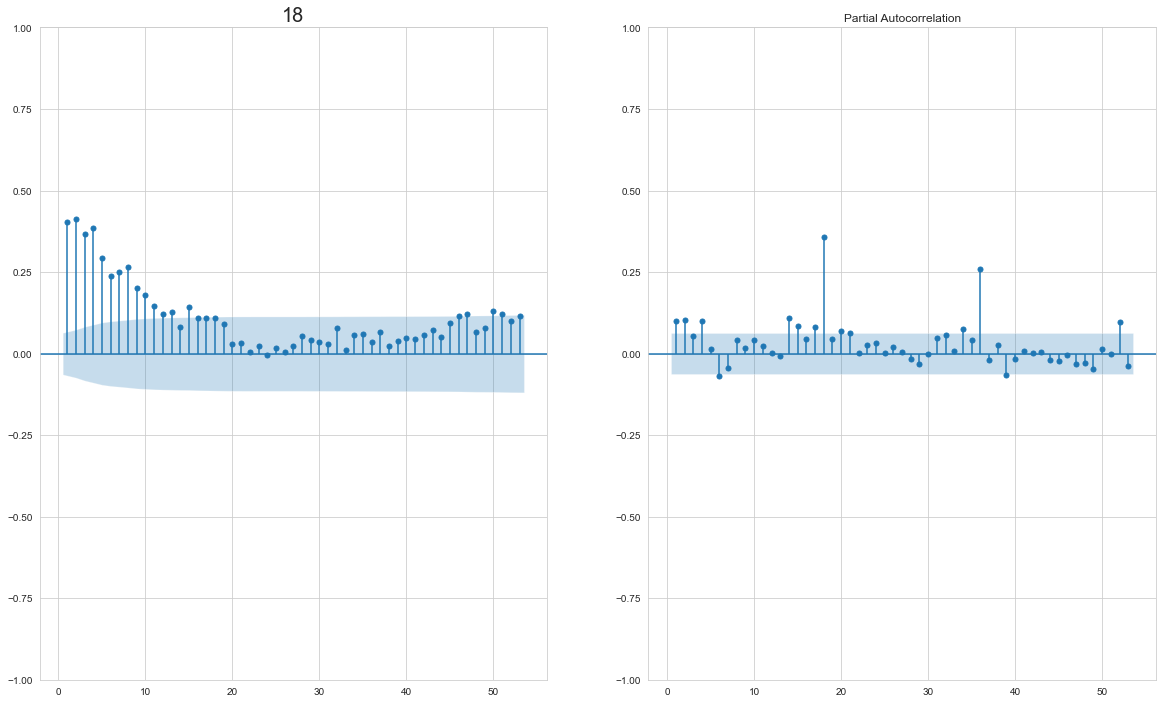

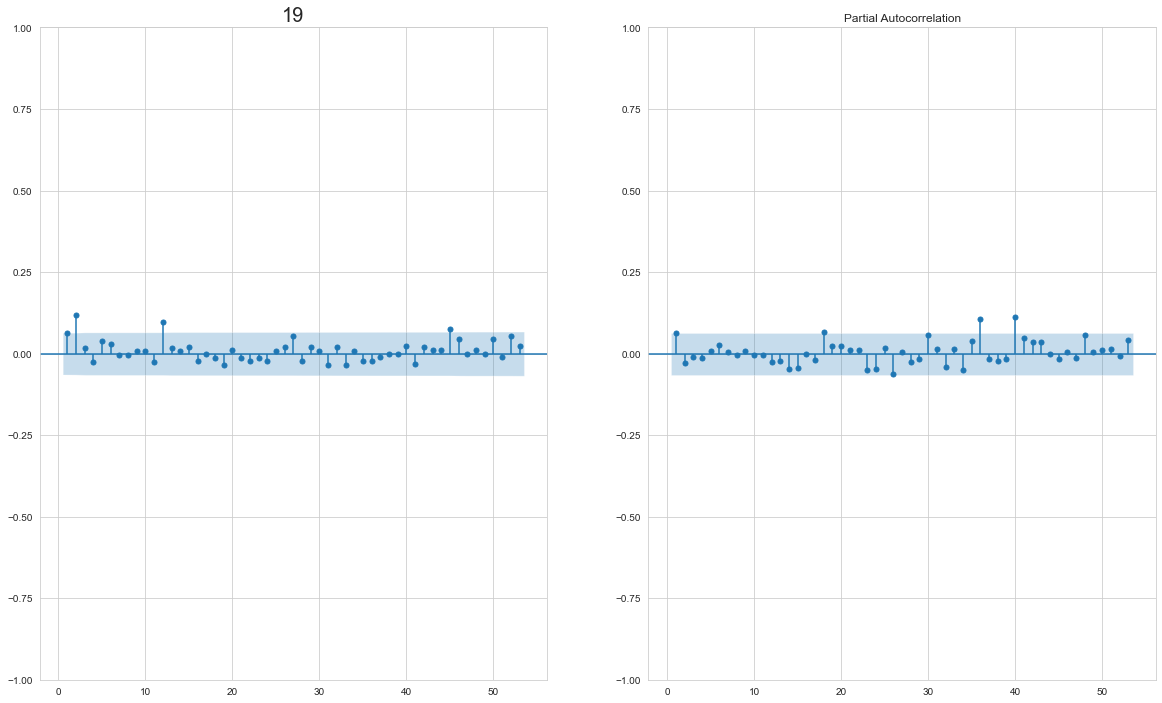

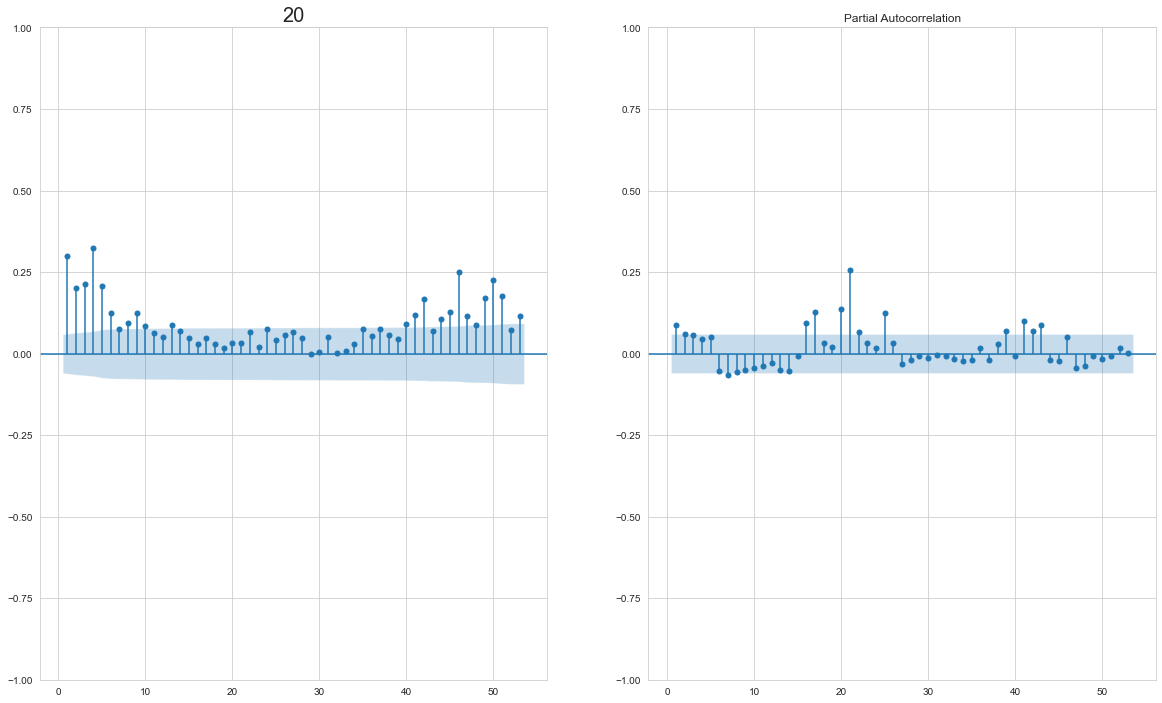

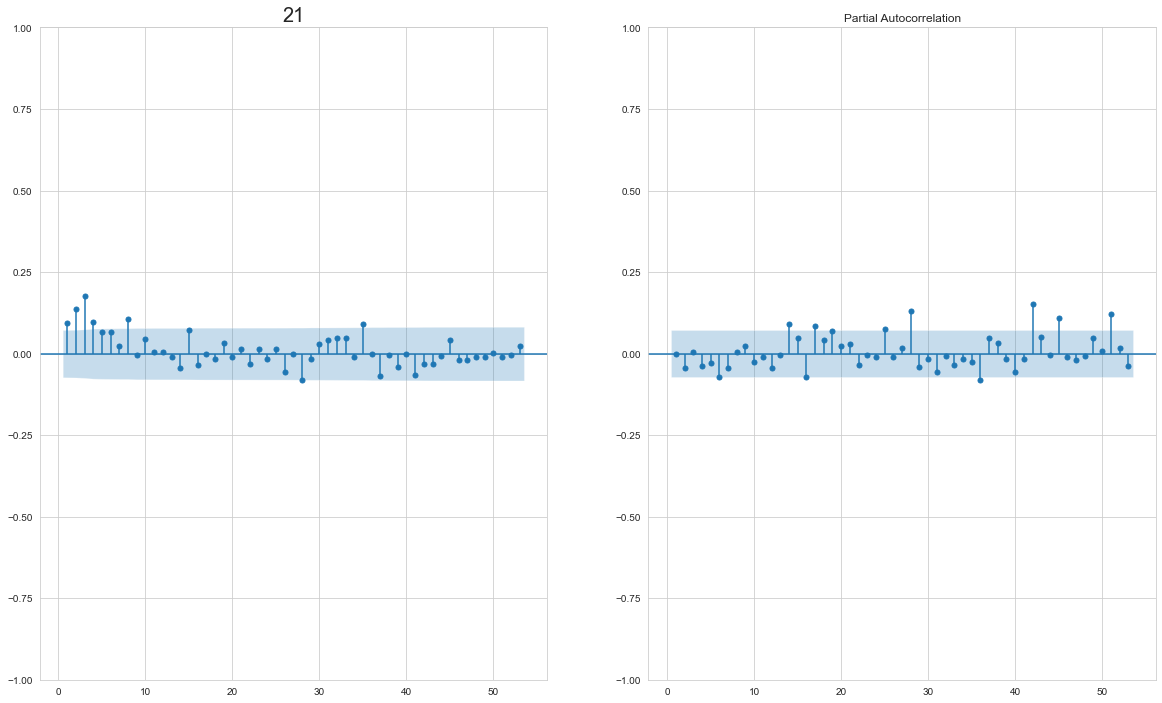

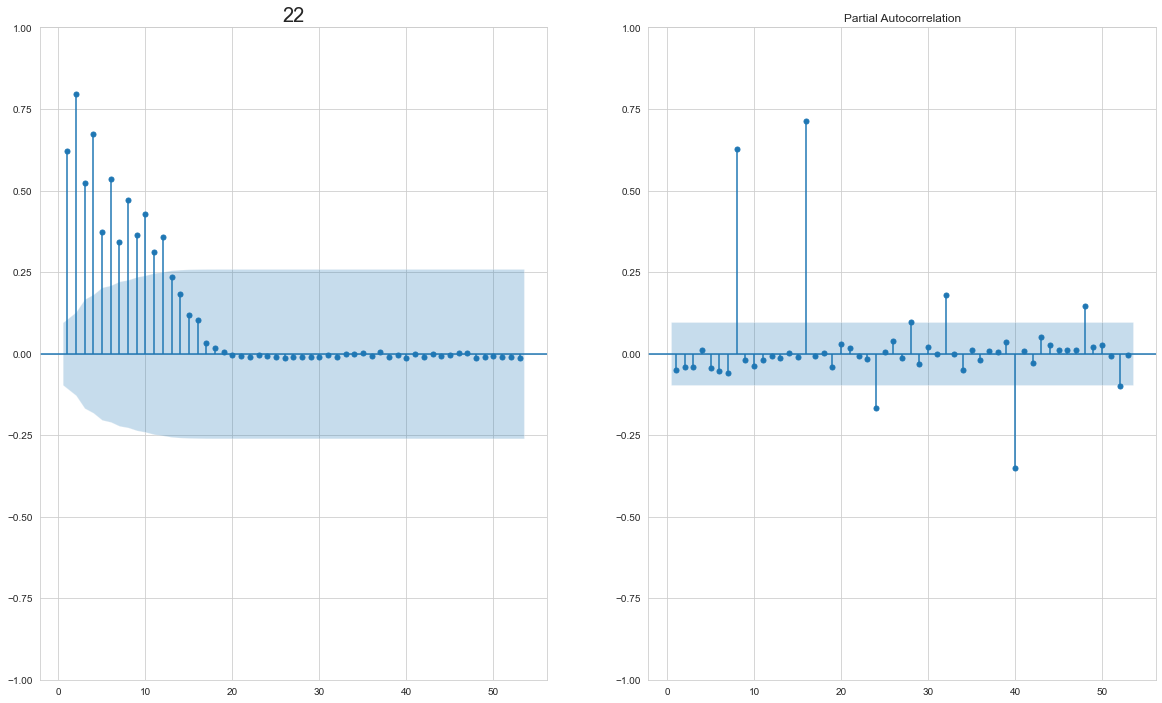

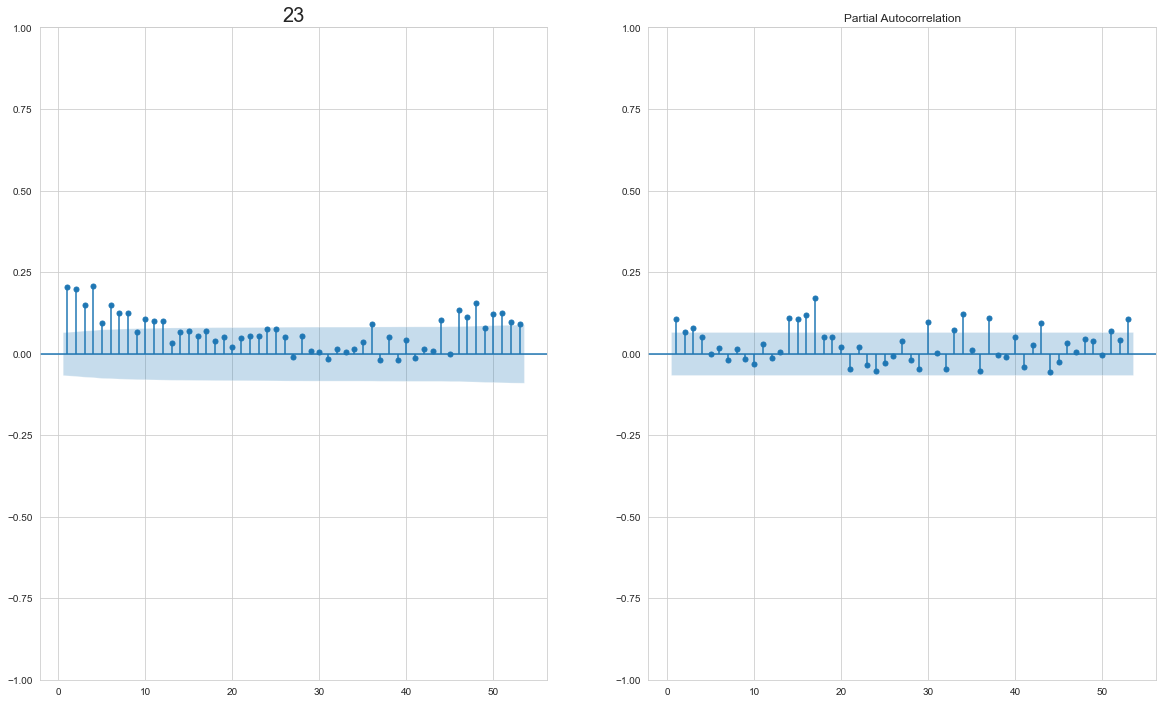

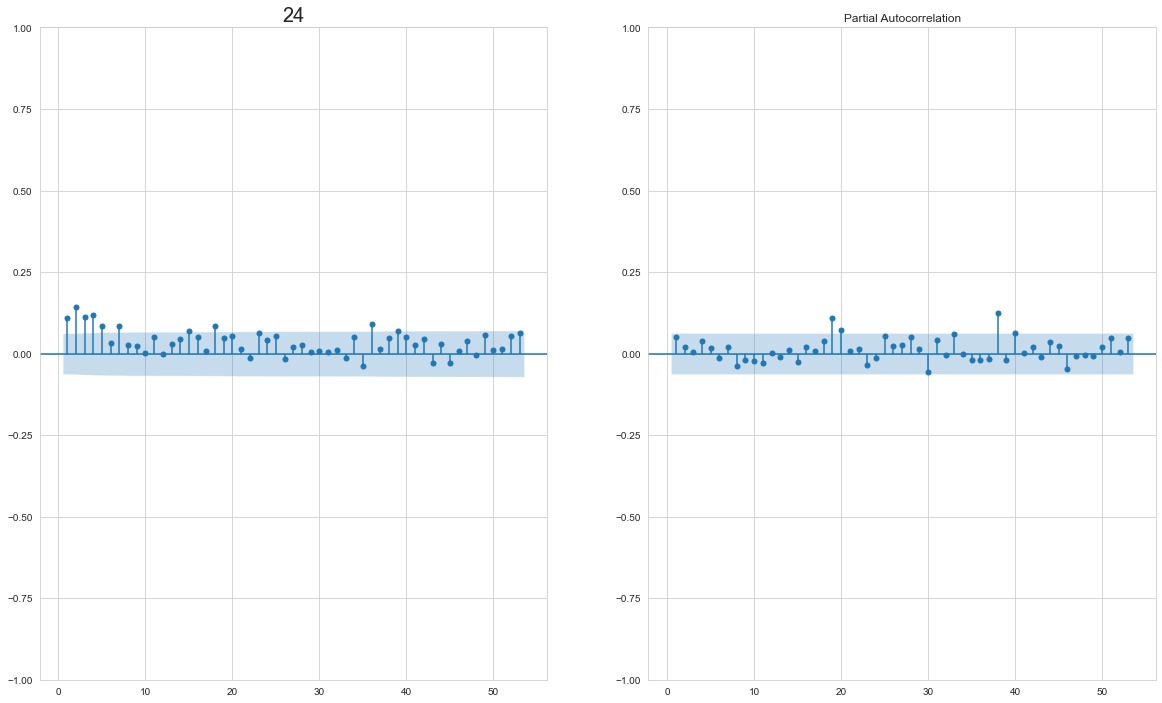

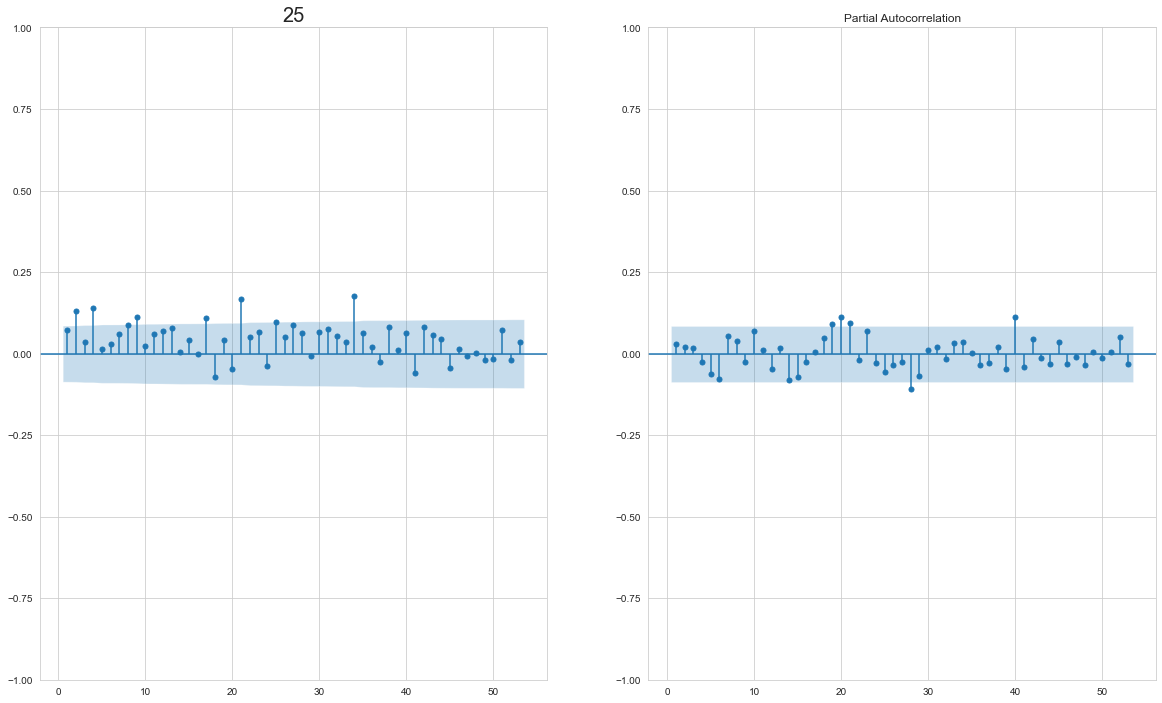

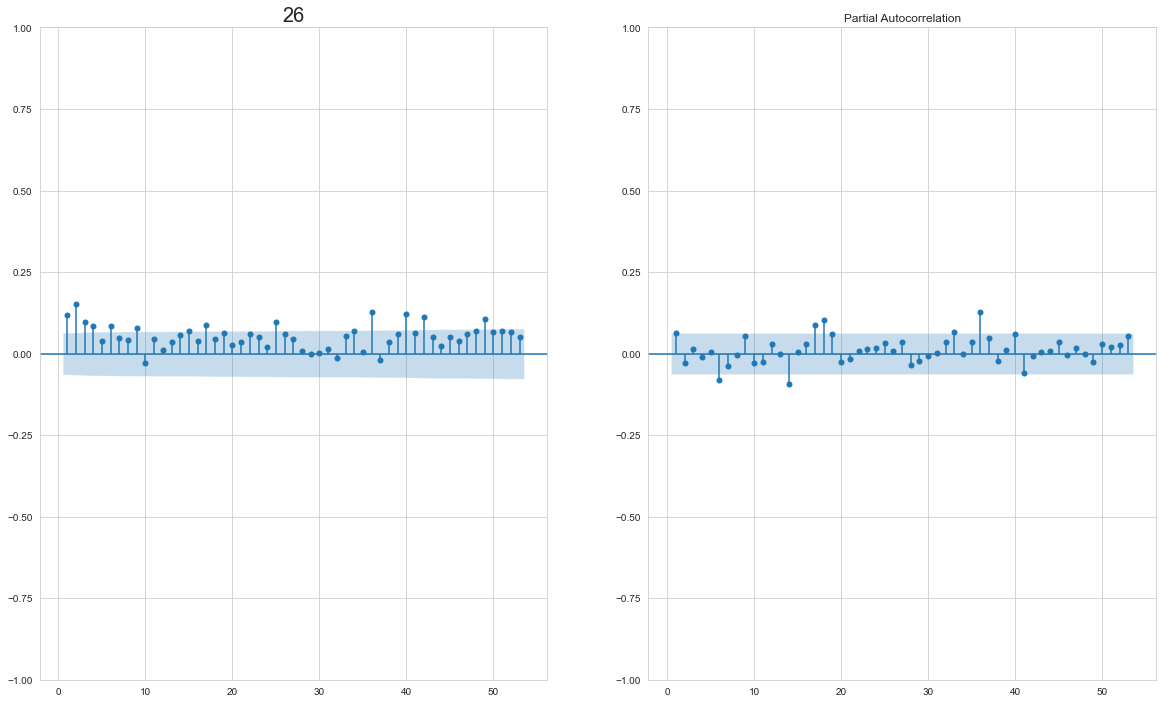

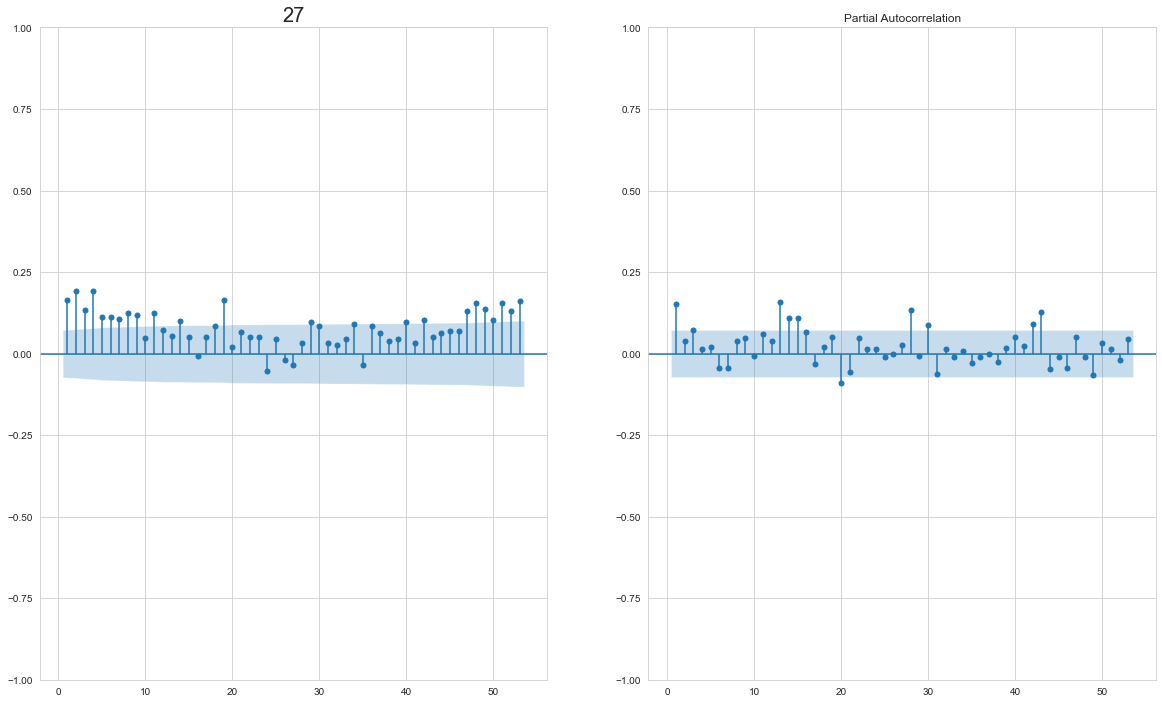

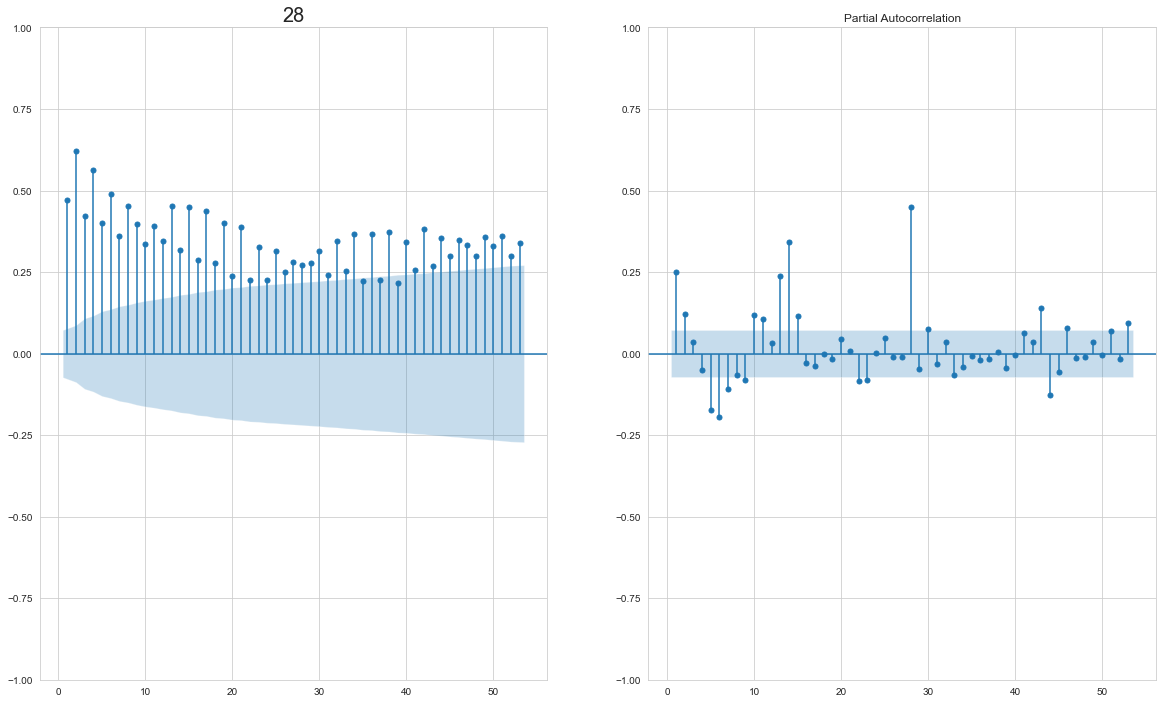

In [441]:
for idx, value in enumerate(t_list):
#     print(f"*************{value.strip('_')}*************")
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,12])
    plot_acf(ser_dt[ser_dt['capsite_year'].str.contains(value)].sort_values(by=['year', 'Week_Caught'])['value'], zero=False, ax=ax[0], lags=53);
    plot_pacf(ser_dt[ser_dt['capsite_year'].str.contains(value)]['value'], zero=False, ax=ax[1], lags=53);
    ax[0].set_title(idx, fontsize=20)

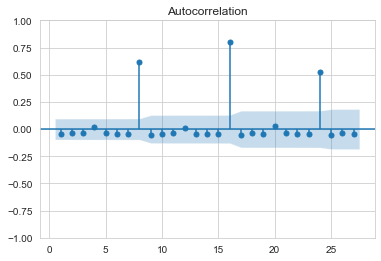

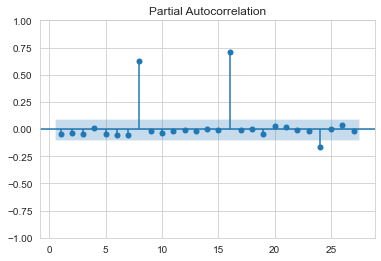

In [442]:
plot_acf(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'], zero=False);
plot_pacf(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'], zero=False);

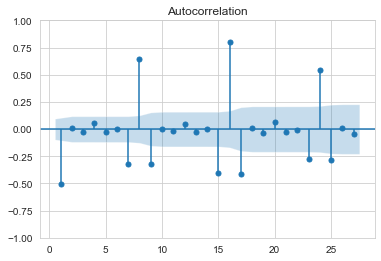

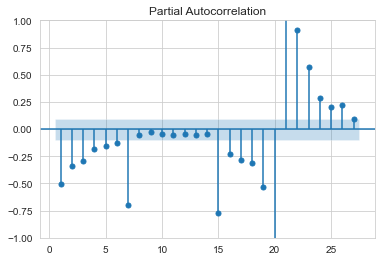

In [443]:
plot_acf(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'].diff().dropna(), zero=False);
plot_pacf(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'].diff().dropna(), zero=False);

In [444]:
adfuller(ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]['value'].diff().dropna())

(-17.022948194746853,
 8.431217580311753e-30,
 14,
 402,
 {'1%': -3.446722009322339,
  '5%': -2.868756617175256,
  '10%': -2.570614247667137},
 930.9026481764995)

# Model Determination

In [445]:
import pmdarima as pm

In [446]:
# !pip install pmdarima

In [447]:
df_s_0 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_0_')]
df_s_1 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_1_')]
df_s_2 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_2_')]
df_s_3 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_3_')]
df_s_4 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_4_')]
df_s_5 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_5_')]
df_s_6 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_6_')]
df_s_7 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_7_')]
df_s_8 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_8_')]
df_s_9 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_9_')]
df_s_10 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_10_')]
df_s_11 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_11_')]
df_s_12 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_12_')]
df_s_13 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_13_')]
df_s_14 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_14_')]
df_s_15 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_15_')]
df_s_16 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_16_')]
df_s_17 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_17_')]
df_s_18 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_18_')]
df_s_19 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_19_')]
df_s_20 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_20_')]
df_s_21 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_21_')]
df_s_22 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_22_')]
df_s_23 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_23_')]
df_s_24 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_24_')]
df_s_25 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_25_')]
df_s_26 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_26_')]
df_s_27 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_27_')]
df_s_28 = ser_dt[ser_dt['capsite_year'].str.contains('CaptureSite_28_')]

In [448]:
df_s_0

,capsite_year,Week_Caught,value,year
0,CaptureSite_0_2000,1,0,2000
1,CaptureSite_0_2001,1,0,2001
2,CaptureSite_0_2002,1,0,2002
3,CaptureSite_0_2003,1,0,2003
4,CaptureSite_0_2004,1,0,2004
...,...,...,...,...
24341,CaptureSite_0_2018,52,0,2018
24808,CaptureSite_0_2004,53,0,2004
24810,CaptureSite_0_2009,53,0,2009
24815,CaptureSite_0_2015,53,0,2015


In [449]:
df_s_0 = df_s_0.sort_values(by=['year', 'Week_Caught'])
df_s_1 = df_s_1.sort_values(by=['year', 'Week_Caught'])
df_s_2 = df_s_2.sort_values(by=['year', 'Week_Caught'])
df_s_3 = df_s_3.sort_values(by=['year', 'Week_Caught'])
df_s_4 = df_s_4.sort_values(by=['year', 'Week_Caught'])
df_s_5 = df_s_5.sort_values(by=['year', 'Week_Caught'])
df_s_6 = df_s_6.sort_values(by=['year', 'Week_Caught'])
df_s_7 = df_s_7.sort_values(by=['year', 'Week_Caught'])
df_s_8 = df_s_8.sort_values(by=['year', 'Week_Caught'])
df_s_9 = df_s_9.sort_values(by=['year', 'Week_Caught'])
df_s_10 = df_s_10.sort_values(by=['year', 'Week_Caught'])
df_s_11 = df_s_11.sort_values(by=['year', 'Week_Caught'])
df_s_12 = df_s_12.sort_values(by=['year', 'Week_Caught'])
df_s_13 = df_s_13.sort_values(by=['year', 'Week_Caught'])
df_s_14 = df_s_14.sort_values(by=['year', 'Week_Caught'])
df_s_15 = df_s_15.sort_values(by=['year', 'Week_Caught'])
df_s_16 = df_s_16.sort_values(by=['year', 'Week_Caught'])
df_s_17 = df_s_17.sort_values(by=['year', 'Week_Caught'])
df_s_18 = df_s_18.sort_values(by=['year', 'Week_Caught'])
df_s_19 = df_s_19.sort_values(by=['year', 'Week_Caught'])
df_s_20 = df_s_20.sort_values(by=['year', 'Week_Caught'])
df_s_21 = df_s_21.sort_values(by=['year', 'Week_Caught'])
df_s_22 = df_s_22.sort_values(by=['year', 'Week_Caught'])
df_s_23 = df_s_23.sort_values(by=['year', 'Week_Caught'])
df_s_24 = df_s_24.sort_values(by=['year', 'Week_Caught'])
df_s_25 = df_s_25.sort_values(by=['year', 'Week_Caught'])
df_s_26 = df_s_26.sort_values(by=['year', 'Week_Caught'])
df_s_27 = df_s_27.sort_values(by=['year', 'Week_Caught'])
df_s_28 = df_s_28.sort_values(by=['year', 'Week_Caught'])

In [450]:
results = pm.auto_arima(df_s_0['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=4,
                        max_q=4,   
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
#                         trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=837.620, Time=1.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=840.907, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=842.638, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=842.671, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=903.758, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=838.906, Time=1.94 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=838.953, Time=2.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=840.884, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=840.735, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=839.246, Time=3.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=838.803, Time=1.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 12.020 seconds


In [349]:
results = pm.auto_arima(df_s_1['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=4,
                        max_q=4,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2353.901, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2595.477, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2523.995, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2554.940, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2595.477, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2350.313, Time=0.95 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2423.651, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2345.467, Time=1.95 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2406.839, Time=0.43 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2347.188, Time=2.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2346.253, Time=2.81 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2344.896, Time=1.68 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2351.422, Time=1.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2346.318, Time=1.84 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept

In [173]:
results = pm.auto_arima(df_s_2['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1829.186, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1892.993, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1881.147, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1884.671, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1892.993, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1831.148, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1831.154, Time=0.77 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1865.126, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1858.205, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1824.963, Time=1.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1821.372, Time=1.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1828.767, Time=1.28 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1822.301, Time=1.40 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1812.685, Time=1.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [174]:
results = pm.auto_arima(df_s_3['value'],
                        d=1,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=936.695, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1270.917, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=949.605, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1059.820, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1270.917, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=927.617, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=946.435, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=917.387, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=933.118, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=906.115, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=909.702, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=861.444, Time=0.47 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=892.817, Time=0.17 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=853.903, Time=0.50 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=86

In [175]:
results = pm.auto_arima(df_s_4['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        seasonal=False,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2123.723, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2210.319, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2174.098, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2183.697, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2125.720, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2125.720, Time=0.54 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2165.927, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2152.075, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2120.984, Time=0.86 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2122.649, Time=1.17 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2123.812, Time=0.88 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2127.543, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2127.515, Time=0.73 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2124.571, Time=1.62 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept

In [176]:
results = pm.auto_arima(df_s_5['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3107.606, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3146.771, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3137.218, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3139.471, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3146.771, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3107.875, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3107.792, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3129.690, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3123.628, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3109.583, Time=1.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3107.606, Time=0.41 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.509 seconds


In [177]:
results = pm.auto_arima(df_s_6['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=948.361, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=964.441, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=963.644, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=964.209, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=964.441, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=950.351, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=950.353, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=959.412, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=957.387, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=950.159, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=948.361, Time=0.57 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 3.617 seconds


In [178]:
results = pm.auto_arima(df_s_7['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2162.444, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2198.172, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2187.024, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2189.903, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2198.172, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2164.046, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2164.164, Time=0.69 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2175.606, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2170.163, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2164.983, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2162.444, Time=0.46 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.471 seconds


In [179]:
results = pm.auto_arima(df_s_8['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=871.500, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=931.494, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=914.804, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=919.548, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=931.494, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=872.825, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=872.865, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=905.215, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=895.225, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=873.340, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=871.500, Time=0.32 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 2.834 seconds


In [180]:
results = pm.auto_arima(df_s_9['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3377.249, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3772.993, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3590.527, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3687.747, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3772.993, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3351.133, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3368.696, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3326.991, Time=0.95 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3366.828, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3325.127, Time=0.45 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3325.380, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3308.560, Time=1.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3326.577, Time=0.29 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=3325.354, Time=0.54 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [181]:
results = pm.auto_arima(df_s_10['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2952.296, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3453.761, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3211.885, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3328.353, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3453.761, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2929.637, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3000.691, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2929.135, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2969.477, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2928.651, Time=0.52 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2947.206, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2915.491, Time=0.68 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2917.695, Time=0.42 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=2916.445, Time=1.12 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [182]:
results = pm.auto_arima(df_s_11['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2092.900, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2135.214, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2101.211, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2108.166, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2135.214, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2090.504, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2091.365, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2091.768, Time=0.68 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2091.290, Time=0.92 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2094.075, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2092.920, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2088.869, Time=1.61 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2090.720, Time=1.79 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2090.802, Time=1.85 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [183]:
results = pm.auto_arima(df_s_12['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='bic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=2516.193, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=2547.613, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=2533.656, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=2536.551, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=2547.613, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=2522.385, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=2522.361, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : BIC=2537.845, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=2534.557, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=2529.154, Time=1.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=2516.193, Time=0.42 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 4.041 seconds


In [184]:
results = pm.auto_arima(df_s_13['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3099.157, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3291.905, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3221.544, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3250.392, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3291.905, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3097.551, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3129.131, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3086.250, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3127.490, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3084.146, Time=0.62 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3104.625, Time=0.27 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3081.889, Time=1.51 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3097.386, Time=0.39 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=3087.059, Time=0.69 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [185]:
results = pm.auto_arima(df_s_14['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1512.135, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1540.259, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1532.956, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1533.724, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1540.259, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1512.308, Time=1.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1512.294, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1534.319, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1532.553, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1511.899, Time=0.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1513.668, Time=1.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1513.832, Time=1.49 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1515.453, Time=1.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1514.609, Time=1.30 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept

In [186]:
results = pm.auto_arima(df_s_15['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3674.053, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4253.060, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4081.861, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4178.276, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4253.060, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3602.380, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3697.825, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3567.227, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3675.190, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3566.619, Time=1.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3605.866, Time=0.28 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3554.700, Time=1.29 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3605.348, Time=0.29 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=3553.009, Time=1.23 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept

In [187]:
results = pm.auto_arima(df_s_16['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3752.111, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4113.775, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3955.284, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4023.318, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4113.775, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3749.902, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3804.118, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3736.882, Time=0.77 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3777.177, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3737.499, Time=1.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3737.533, Time=1.32 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3746.098, Time=0.60 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3765.787, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3733.161, Time=1.28 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [188]:
results = pm.auto_arima(df_s_17['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1285.653, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1344.420, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1346.278, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1346.323, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1344.420, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1267.107, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1315.628, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1268.789, Time=0.79 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1266.937, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1268.138, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1268.073, Time=0.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1267.677, Time=0.66 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1269.836, Time=0.61 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1268.501, Time=0.87 sec
 ARIMA(2,0,2)(0,0,0)[0]          

In [189]:
results = pm.auto_arima(df_s_18['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-88.347, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-89.938, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-89.662, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-89.825, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-89.938, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.508 seconds


In [190]:
results = pm.auto_arima(df_s_19['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2733.566, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2824.585, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2813.758, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2816.507, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2824.585, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2734.377, Time=0.93 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2734.388, Time=0.71 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2804.578, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2796.189, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2733.296, Time=1.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2735.309, Time=1.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2735.460, Time=1.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2736.372, Time=1.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2736.358, Time=1.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept

In [191]:
results = pm.auto_arima(df_s_20['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
#                         trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1327.815, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1351.734, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1353.323, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1353.410, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1417.063, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1318.678, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1342.890, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1318.912, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1314.270, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1316.922, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1315.739, Time=0.97 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1315.888, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1316.124, Time=0.64 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1314.324, Time=1.20 sec
 ARIMA(2,0,2)(0,0,0)[0]          

In [192]:
# model = SARIMAX(df_s_19, order=(2,0,2), seasonal_order=(0,0,0,0))
# results = model.fit()
# results.plot_diagnostics()

In [193]:
results = pm.auto_arima(df_s_21['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2923.680, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3016.832, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3013.883, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3015.645, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3016.832, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2918.301, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2941.231, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2897.020, Time=1.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2942.119, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2896.114, Time=1.65 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2921.345, Time=0.26 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2892.611, Time=1.74 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2922.588, Time=0.25 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=2893.172, Time=1.94 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [194]:
results = pm.auto_arima(df_s_22['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2084.668, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2297.349, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2243.063, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2267.271, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2297.349, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2080.566, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2107.884, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2052.154, Time=1.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2107.094, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2049.601, Time=1.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2086.148, Time=0.20 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2049.855, Time=1.44 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2055.538, Time=1.48 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2045.806, Time=0.90 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept

In [195]:
results = pm.auto_arima(df_s_23['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4497.647, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4682.856, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4570.248, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4600.988, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4682.856, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4489.865, Time=1.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4540.312, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4486.164, Time=1.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4526.397, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4502.872, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4489.350, Time=1.59 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4484.187, Time=1.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4492.244, Time=0.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=4491.805, Time=1.56 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept

In [196]:
results = pm.auto_arima(df_s_24['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1949.006, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2157.361, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2059.218, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2089.974, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2157.361, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1937.392, Time=0.79 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2015.248, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1940.777, Time=1.34 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1952.823, Time=1.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1939.334, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1994.848, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1938.248, Time=1.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1937.392, Time=0.86 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 7.615 seconds


In [197]:
results = pm.auto_arima(df_s_25['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4694.411, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4986.419, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4828.612, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4890.696, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4986.419, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4691.573, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4739.312, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4693.472, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4693.714, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4691.372, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4818.543, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=4693.173, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=4799.100, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=4694.938, Time=0.96 sec
 ARIMA(1,0,2)(0,0,0)[0]          

In [198]:
results = pm.auto_arima(df_s_26['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=467.066, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=473.504, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=471.806, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=472.498, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=473.504, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=463.459, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=461.471, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=463.449, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=464.722, Time=0.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=461.471, Time=0.14 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.289 seconds


In [199]:
results = pm.auto_arima(df_s_27['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3886.689, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4051.202, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3950.162, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3972.034, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4051.202, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3887.878, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3887.607, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3955.524, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3936.048, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3888.662, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3886.689, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 2.837 seconds


In [200]:
results = pm.auto_arima(df_s_28['value'],
                        d=0,
                        start_p=1,
                        start_q=1,
                        max_p=6,
                        max_q=6,
                        information_criterion='aic',
                        trace=True,
                        error_action='ignore',
                        stepwise=True,
                        trend='c'
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1118.213, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1146.353, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1141.962, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1143.211, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1146.353, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1115.609, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1131.580, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1114.322, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1115.355, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1116.244, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1116.289, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1116.155, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1114.782, Time=0.18 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1117.542, Time=0.82 sec
 ARIMA(3,0,1)(0,0,0)[0]          

In [201]:
from statsmodels.tsa.arima.model import ARIMA

In [451]:
model_0 = ARIMA(df_s_0['value'], order=(1,0,1))
model_1 = ARIMA(df_s_1['value'], order=(3,0,4))
model_2 = ARIMA(df_s_2['value'], order=(3,0,3))
model_3 = ARIMA(df_s_3['value'], order=(5,1,4))
model_4 = ARIMA(df_s_4['value'], order=(2,0,2))
model_5 = ARIMA(df_s_5['value'], order=(1,0,1))
model_6 = ARIMA(df_s_6['value'], order=(1,0,1))
model_7 = ARIMA(df_s_7['value'], order=(1,0,1))
model_8 = ARIMA(df_s_8['value'], order=(1,0,1))
model_9 = ARIMA(df_s_9['value'], order=(5,0,1))
model_10 = ARIMA(df_s_10['value'], order=(5,0,1))
model_11 = ARIMA(df_s_11['value'], order=(3,0,2))
model_12 = ARIMA(df_s_12['value'], order=(1,0,1))
model_13 = ARIMA(df_s_13['value'], order=(5,0,1))
model_14 = ARIMA(df_s_14['value'], order=(2,0,2))
model_15 = ARIMA(df_s_15['value'], order=(6,0,2))
model_16 = ARIMA(df_s_16['value'], order=(4,0,2))
model_17 = ARIMA(df_s_17['value'], order=(2,0,2))
model_18 = ARIMA(df_s_18['value'], order=(0,0,0))
model_19 = ARIMA(df_s_19['value'], order=(2,0,2))
model_20 = ARIMA(df_s_20['value'], order=(2,0,2))
model_21 = ARIMA(df_s_21['value'], order=(5,0,1))
model_22 = ARIMA(df_s_22['value'], order=(3,0,2))
model_23 = ARIMA(df_s_23['value'], order=(2,0,2))
model_24 = ARIMA(df_s_24['value'], order=(2,0,1))
model_25 = ARIMA(df_s_25['value'], order=(1,0,2))
model_26 = ARIMA(df_s_26['value'], order=(2,0,0))
model_27 = ARIMA(df_s_27['value'], order=(1,0,1))
model_28 = ARIMA(df_s_28['value'], order=(3,0,1))

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [452]:
result_0 = model_0.fit()
result_1 = model_1.fit()
result_2 = model_2.fit()
result_3 = model_3.fit()
result_4 = model_4.fit()
result_5 = model_5.fit()
result_6 = model_6.fit()
result_7 = model_7.fit()
result_8 = model_8.fit()
result_9 = model_9.fit()
result_10 = model_10.fit()
result_11 = model_11.fit()
result_12 = model_12.fit()
result_13 = model_13.fit()
result_14 = model_14.fit()
result_15 = model_15.fit()
result_16 = model_16.fit()
result_17 = model_17.fit()
result_18 = model_18.fit()
result_19 = model_19.fit()
result_20 = model_20.fit()
result_21 = model_21.fit()
result_22 = model_22.fit()
result_23 = model_23.fit()
result_24 = model_24.fit()
result_25 = model_25.fit()
result_26 = model_26.fit()
result_27 = model_27.fit()
result_28 = model_28.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:6

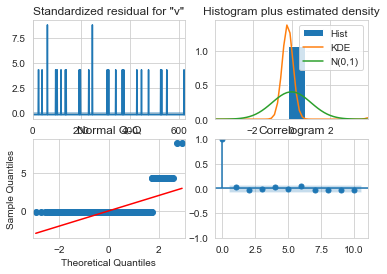

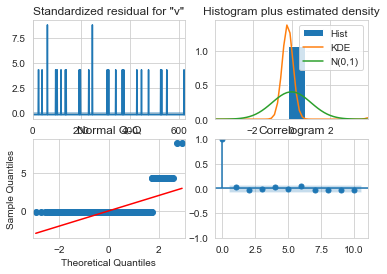

In [453]:
result_18.plot_diagnostics()

In [454]:
s_0 = result_0.get_forecast(steps=44).predicted_mean
s_1 = result_1.get_forecast(steps=44).predicted_mean
s_2 = result_2.get_forecast(steps=44).predicted_mean
s_3 = result_3.get_forecast(steps=44).predicted_mean
s_4 = result_4.get_forecast(steps=44).predicted_mean
s_5 = result_5.get_forecast(steps=44).predicted_mean
s_6 = result_6.get_forecast(steps=44).predicted_mean
s_7 = result_7.get_forecast(steps=44).predicted_mean
s_8 = result_8.get_forecast(steps=44).predicted_mean
s_9 = result_9.get_forecast(steps=44).predicted_mean
s_10 = result_10.get_forecast(steps=44).predicted_mean
s_11 = result_11.get_forecast(steps=44).predicted_mean
s_12 = result_12.get_forecast(steps=44).predicted_mean
s_13 = result_13.get_forecast(steps=44).predicted_mean
s_14 = result_14.get_forecast(steps=44).predicted_mean
s_15 = result_15.get_forecast(steps=44).predicted_mean
s_16 = result_16.get_forecast(steps=44).predicted_mean
s_17 = result_17.get_forecast(steps=44).predicted_mean
s_18 = result_18.get_forecast(steps=44).predicted_mean
s_19 = result_19.get_forecast(steps=44).predicted_mean
s_20 = result_20.get_forecast(steps=44).predicted_mean
s_21 = result_21.get_forecast(steps=44).predicted_mean
s_22 = result_22.get_forecast(steps=44).predicted_mean
s_23 = result_23.get_forecast(steps=44).predicted_mean
s_24 = result_24.get_forecast(steps=44).predicted_mean
s_25 = result_25.get_forecast(steps=44).predicted_mean
s_26 = result_26.get_forecast(steps=44).predicted_mean
s_27 = result_27.get_forecast(steps=44).predicted_mean
s_28 = result_28.get_forecast(steps=44).predicted_mean

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\ts

In [455]:
c_sites = [
    'CaptureSite_0_',
    'CaptureSite_1_',
    'CaptureSite_2_',
    'CaptureSite_3_',
    'CaptureSite_4_',
    'CaptureSite_5_',
    'CaptureSite_6_',
    'CaptureSite_7_',
    'CaptureSite_8_',
    'CaptureSite_9_',
    'CaptureSite_10_',
    'CaptureSite_11_',
    'CaptureSite_12_',
    'CaptureSite_13_',
    'CaptureSite_14_',
    'CaptureSite_15_',
    'CaptureSite_16_',
    'CaptureSite_17_',
    'CaptureSite_18_',
    'CaptureSite_19_',
    'CaptureSite_20_',
    'CaptureSite_21_',
    'CaptureSite_22_',
    'CaptureSite_23_',
    'CaptureSite_24_',
    'CaptureSite_25_',
    'CaptureSite_26_',
    'CaptureSite_27_',
    'CaptureSite_28_',
]

In [456]:
ss.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [457]:
idx = [site+'2019'+f"{num:02}" for site in c_sites for num in np.arange(1,45,1)]

In [458]:
len(idx)

1276

In [459]:
len(ss['ID'])

1276

In [460]:
preds = []

for val in [
    s_0,
    s_1,
    s_2,
    s_3,
    s_4,
    s_5,
    s_6,
    s_7,
    s_8,
    s_9,
    s_10,
    s_11,
    s_12,
    s_13,
    s_14,
    s_15,
    s_16,
    s_17,
    s_18,
    s_19,
    s_20,
    s_21,
    s_22,
    s_23,
    s_24,
    s_25,
    s_26,
    s_27,
    s_28,
    ]:
    l = list(val)
    preds.extend(l)

In [461]:
len(preds)

1276

In [462]:
sub = pd.DataFrame.from_dict(dict(zip(idx, preds)), orient='index').reset_index().rename(columns={'index':'ID', 0:'Capture_Number'})

In [463]:
sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,0.149732
1,CaptureSite_0_201902,0.149255
2,CaptureSite_0_201903,0.148786
3,CaptureSite_0_201904,0.148324
4,CaptureSite_0_201905,0.147870


In [464]:
sub.to_csv('sub.csv', index=False)

In [465]:
sub.tail()

,ID,Capture_Number
1271,CaptureSite_28_201940,0.201400
1272,CaptureSite_28_201941,0.201400
1273,CaptureSite_28_201942,0.201400
1274,CaptureSite_28_201943,0.201400
1275,CaptureSite_28_201944,0.201401


<AxesSubplot:>

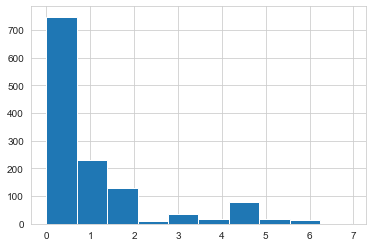

In [466]:
sub['Capture_Number'].hist()